<a href="https://colab.research.google.com/github/MayaMM99/IST-718/blob/master/Mileva_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IST 718

##Laboratory Exercise 2

### __Zip Code Investments__

#### Maya Mileva
![alt text](https://wp-tid.zillowstatic.com/3/ZRIMethodology_2019-9d9344-630x420.jpg)



#### **Objective**


 1. __O__btain data and understand data structures and data elements.
 2. __S__crub data using scripting methods, to include debugging, for data manipulation in R and other tools. 
 3. __E__xplore data using essential qualitative analysis techniques including descriptive statistics. 
 4. __M__odel relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users. 
 5. __IN__terpret the data, model, analysis, and findings.  Communicate the results in a meaningful way. 

#### __Instructions__


***The research question is can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?***

- Using the base data available from Zillow (http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)
   - Review the data – clean as appropriate
   - Provide an initial data analysis to include (but not limited to):
      - Develop time series plots for the following Arkansas metro areas:
         - Hot Springs, Little Rock, Fayetteville, Searcy
         - Present all values from 1997 to present
         - Average at the metro area level
- Using data from Zillow:
   - Develop model(s) for forecasting average median housing value by zip code for 2018
   - Use the historical data from 1997 through 2017 as your training data
   - Integrate data from other sources (think Bureau of Labor Statistics and Census data) to improve upon your base model(s)
- Answer the following questions:

  - What technique/algorithm/decision process did you use to down sample? (BONUS FOR NOT DOWN SAMPLING)
  - What three zip codes provide the best investment opportunity for the SREIT?
  - Why?
- Bonus: Develop a geographic visualization that in your view best depicts the data and recommendations:
  - By state
  - Median housing for Dec(state average)

#### __Datasets__

**This project is using the base data available from Zillow: (http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)**

The data contains descriptive variable indicating the zip code, city, county, state and Region ID. It also contains an ordinal variable SizeRank, which ranks the zip codes by urbanization. More urbanized zip codes have a higher rank. The data also provides median house prices for the time periods between  1996 to  2018. Data from 1997 through 2017 will be used as training data. 

Four more datasets were added were added on: 

- Dept of Labor Employment Dataset
Employment rate from 1996-01 till 2020-03
  - https://beta.bls.gov/dataViewer/view/timeseries/CES0000000001;jsessionid=542AB1B7EFC43613AD715045DF37B0B6

- Dept of Labor Unemployment Rate Dataset 
Unemployment rate from 1996-01 till 2020-03
  - https://beta.bls.gov/dataViewer/view/timeseries/CES0000000001;jsessionid=542AB1B7EFC43613AD715045DF37B0B6

- 30-Year Fixed Mortgage Rates
  - http://www.freddiemac.com/pmms/pmms_archives.html

- Delinquencies on All Loans and Leases, Secured by Real Estate, Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks 
  - http://www.freddiemac.com/pmms/pmms_archives.html



#### __Data Analysis__

In [0]:
 # !pip install fbprophet

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
## Load the packages
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
import pylab

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA 
from pandas import Series
from statistics import mean
from statistics import median
from math import sqrt
import math

import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import plotly.graph_objects as go

import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification


from matplotlib import pyplot

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

import plotly as py
import plotly.graph_objects as go

#!pip install fbprophet
from fbprophet import Prophet

!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import auto_arima

pd.plotting.register_matplotlib_converters() 



#####  __O__btain

In [0]:
## Load the data
df=pd.read_csv('http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin-1')

In [201]:
df.shape

(30464, 300)

In [202]:
len(df['RegionName'].unique()) # 30,464 zip codes, one for each row.

30464

In [203]:
#df.head(7) # data is in a long format 
# Update Zip
df = df.rename(columns={'RegionName':'Zip'}, index=str)
df.head()

RegionID  SizeRank    Zip RegionType StateName State      City  \
0     61639         0  10025        Zip        NY    NY  New York   
1     84654         1  60657        Zip        IL    IL   Chicago   
2     61637         2  10023        Zip        NY    NY  New York   
3     91982         3  77494        Zip        TX    TX      Katy   
4     84616         4  60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  1996-02-29  \
0       New York-Newark-Jersey City  New York County         NaN         NaN   
1          Chicago-Naperville-Elgin      Cook County    364892.0    364162.0   
2       New York-Newark-Jersey City  New York County         NaN         NaN   
3  Houston-The Woodlands-Sugar Land    Harris County    200475.0    200723.0   
4          Chicago-Naperville-Elgin      Cook County    546663.0    546231.0   

   1996-03-31  1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1    363605.0    362963.0    361660.0    361342.0    360662.0    361804.0   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3    200526.0    199337.0    198200.0    197534.0    198298.0    197986.0   
4    545451.0    545391.0    543066.0    543084.0    542380.0    545254.0   

   1996-09-30  1996-10-31  1996-11-30  1996-12-31  1997-01-31  1997-02-28  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1    363561.0    366592.0    370077.0    372842.0    376806.0    380122.0   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3    197333.0    196543.0    197444.0    199129.0    201687.0    202931.0   
4    548142.0    552660.0    557791.0    562238.0    566446.0    569659.0   

   1997-03-31  1997-04-30  ...  2018-03-31  2018-04-30  2018-05-31  \
0         NaN         NaN  ...   1487969.0   1480591.0   1471324.0   
1    384081.0    385663.0  ...    968807.0    968566.0    969572.0   
2         NaN         NaN  ...   1578799.0   1585506.0   1587796.0   
3    204207.0    206413.0  ...    333247.0    333699.0    334667.0   
4    573409.0    575403.0  ...   1209707.0   1207080.0   1206948.0   

   2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  2018-11-30  \
0   1462476.0   1456223.0   1448110.0   1446622.0   1451579.0   1452858.0   
1    972936.0    973010.0    972447.0    972684.0    975094.0    978629.0   
2   1591265.0   1596660.0   1598258.0   1596017.0   1595032.0   1592948.0   
3    335386.0    335194.0    335478.0    335777.0    336150.0    336558.0   
4   1208617.0   1208706.0   1208528.0   1209725.0   1211606.0   1214779.0   

   2018-12-31  2019-01-31  2019-02-28  2019-03-31  2019-04-30  2019-05-31  \
0   1453112.0   1439554.0   1426900.0   1416568.0   1415022.0   1414474.0   
1    981362.0    979667.0    976810.0    975419.0    975366.0    975741.0   
2   1590038.0   1576594.0   1562766.0   1552128.0   1545711.0   1540137.0   
3    336390.0    336776.0    336806.0    336869.0    336217.0    335679.0   
4   1216093.0   1212725.0   1208171.0   1206835.0   1207121.0   1208395.0   

   2019-06-30  2019-07-31  2019-08-31  2019-09-30  2019-10-31  2019-11-30  \
0   1413747.0   1405862.0   1402547.0   1390420.0   1381621.0   1375725.0   
1    974693.0    975616.0    975734.0    975251.0    974238.0    973104.0   
2   1528603.0   1514894.0   1502233.0   1492429.0   1486122.0   1480426.0   
3    335536.0    335878.0    335940.0    336092.0    336119.0    336083.0   
4   1207765.0   1208853.0   1208481.0   1206304.0   1204013.0   1201182.0   

   2019-12-31  2020-01-31  2020-02-29  2020-03-31  
0   1374714.0   1381453.0   1385737.0   1389268.0  
1    971908.0    972038.0    973671.0    975642.0  
2   1476509.0   1478980.0   1479301.0   1474994.0  
3    336154.0    335860.0    336037.0    336483.0  
4   1198879.0   1198277.0   1199900.0   1200980.0  

[5 rows x 300 columns]

In [204]:
## Find NA`s 
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = df.copy()
na_values = df.isna().sum()

print(na_values)

RegionID          0
SizeRank          0
Zip               0
RegionType        0
StateName         0
State             0
City              0
Metro          7144
CountyName        0
1996-01-31    17240
1996-02-29    16992
1996-03-31    16954
1996-04-30    16932
1996-05-31    16847
1996-06-30    16812
1996-07-31    16789
1996-08-31    16754
1996-09-30    16734
1996-10-31    16714
1996-11-30    16694
1996-12-31    16663
1997-01-31    16551
1997-02-28    16503
1997-03-31    16445
1997-04-30    16394
1997-05-31    16364
1997-06-30    16344
1997-07-31    16325
1997-08-31    16279
1997-09-30    16230
1997-10-31    16188
1997-11-30    16138
1997-12-31    16119
1998-01-31    16079
1998-02-28    16050
1998-03-31    15957
1998-04-30    15793
1998-05-31    15692
1998-06-30    15591
1998-07-31    15539
1998-08-31    15426
1998-09-30    15331
1998-10-31    15276
1998-11-30    15242
1998-12-31    15229
1999-01-31    15075
1999-02-28    15017
1999-03-31    14907
1999-04-30    14850
1999-05-31    14760


In [205]:
print((df.loc[:,'1997-01-31':'1997-12-31'].isna()).sum()) # A LOT OF MISSING VALUES 

1997-01-31    16551
1997-02-28    16503
1997-03-31    16445
1997-04-30    16394
1997-05-31    16364
1997-06-30    16344
1997-07-31    16325
1997-08-31    16279
1997-09-30    16230
1997-10-31    16188
1997-11-30    16138
1997-12-31    16119
dtype: int64


In [206]:
df2 = df[pd.notnull(df['1997-01-31'])].copy()
# check na values after 1997
df2.loc[:,'1997-01-31':'1997-12-31'].isna().sum()

1997-01-31    0
1997-02-28    0
1997-03-31    0
1997-04-30    0
1997-05-31    0
1997-06-30    0
1997-07-31    0
1997-08-31    0
1997-09-30    0
1997-10-31    0
1997-11-30    0
1997-12-31    0
dtype: int64

In [207]:
df2.shape

(13913, 300)

In [208]:
df2.head()

RegionID  SizeRank    Zip RegionType StateName State     City  \
1     84654         1  60657        Zip        IL    IL  Chicago   
3     91982         3  77494        Zip        TX    TX     Katy   
4     84616         4  60614        Zip        IL    IL  Chicago   
5     91940         5  77449        Zip        TX    TX     Katy   
7     91733         7  77084        Zip        TX    TX  Houston   

                              Metro     CountyName  1996-01-31  1996-02-29  \
1          Chicago-Naperville-Elgin    Cook County    364892.0    364162.0   
3  Houston-The Woodlands-Sugar Land  Harris County    200475.0    200723.0   
4          Chicago-Naperville-Elgin    Cook County    546663.0    546231.0   
5  Houston-The Woodlands-Sugar Land  Harris County     97521.0     97513.0   
7  Houston-The Woodlands-Sugar Land  Harris County     97381.0     97405.0   

   1996-03-31  1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  \
1    363605.0    362963.0    361660.0    361342.0    360662.0    361804.0   
3    200526.0    199337.0    198200.0    197534.0    198298.0    197986.0   
4    545451.0    545391.0    543066.0    543084.0    542380.0    545254.0   
5     97471.0     97491.0     97486.0     97458.0     97414.0     97487.0   
7     97330.0     97323.0     97280.0     97261.0     97134.0     97089.0   

   1996-09-30  1996-10-31  1996-11-30  1996-12-31  1997-01-31  1997-02-28  \
1    363561.0    366592.0    370077.0    372842.0    376806.0    380122.0   
3    197333.0    196543.0    197444.0    199129.0    201687.0    202931.0   
4    548142.0    552660.0    557791.0    562238.0    566446.0    569659.0   
5     97621.0     97626.0     97672.0     97755.0     97543.0     97263.0   
7     97111.0     97145.0     97181.0     97205.0     96895.0     96481.0   

   1997-03-31  1997-04-30  1997-05-31  1997-06-30  1997-07-31  1997-08-31  \
1    384081.0    385663.0    389062.0    389359.0    390182.0    388087.0   
3    204207.0    206413.0    208870.0    210582.0    210250.0    212394.0   
4    573409.0    575403.0    581567.0    584316.0    587753.0    585957.0   
5     97003.0     97138.0     97277.0     97514.0     97700.0     97747.0   
7     96141.0     96098.0     96112.0     96101.0     96197.0     96209.0   

   1997-09-30  1997-10-31  1997-11-30  1997-12-31  1998-01-31  1998-02-28  \
1    385729.0    381688.0    377848.0    376493.0    374914.0    375094.0   
3    214904.0    217109.0    216177.0    214468.0    211736.0    210126.0   
4    583932.0    580996.0    578241.0    578355.0    580711.0    585527.0   
5     97753.0     97983.0     98353.0     98624.0     99216.0     99691.0   
7     96207.0     96265.0     96469.0     96676.0     97275.0     97791.0   

   1998-03-31  1998-04-30  1998-05-31  1998-06-30  1998-07-31  1998-08-31  \
1    375012.0    378067.0    380789.0    386605.0    392801.0    400292.0   
3    208420.0    207481.0    206443.0    206033.0    205925.0    204647.0   
4    591659.0    597955.0    604759.0    611702.0    620591.0    630536.0   
5    100179.0    100044.0    100025.0     99914.0     99963.0    100017.0   
7     98282.0     98270.0     98282.0     98292.0     98392.0     98459.0   

   1998-09-30  1998-10-31  1998-11-30  1998-12-31  1999-01-31  1999-02-28  \
1    408057.0    416827.0    425087.0    432120.0    436962.0    441150.0   
3    204133.0    204600.0    206225.0    207084.0    207630.0    208343.0   
4    643350.0    654584.0    665638.0    674824.0    681464.0    686767.0   
5    100156.0    100335.0    100171.0    100043.0    100075.0    100624.0   
7     98548.0     98625.0     98468.0     98328.0     98347.0     98858.0   

   1999-03-31  1999-04-30  1999-05-31  1999-06-30  1999-07-31  1999-08-31  \
1    444482.0    447753.0    450885.0    455497.0    461395.0    467344.0   
3    209594.0    210422.0    211729.0    212988.0    214708.0    215968.0   
4    690649.0    696743.0    700375.0    707488.0    714017.0    722142.0   
5    101366.0    102021.0    102534.0  

In [0]:
df2 = df2.copy()
na_values = df2.isna().sum()

#print(na_values)

In [210]:
len(df2['Zip'].unique()) # down to 13913 zip codes 


13913

In [211]:
print('Number of states: ', len(df2['State'].unique())) # lost 5 states by removinf the missing values

Number of states:  46


In [212]:
## How many zips and metro areas we have per state?
zips_per_state = []
for state in set(df2['State']):
  state_df = df2[df2['State'] == state]
  metro = len(set(state_df['Metro']))
  # avg_price = 
  zips_per_state.append({ 'state': state, 'zips': len(state_df), 'metros': metro })
  print(state, len(state_df), metro)

NJ 534 7
AR 288 22
NV 95 4
CA 1156 29
FL 786 28
NY 1498 27
DE 45 3
LA 62 6
DC 20 1
VA 328 13
OH 839 45
CT 140 6
ME 152 5
NE 79 4
SD 1 1
IL 405 16
KY 274 24
MD 417 9
AL 133 18
HI 48 3
RI 76 1
AZ 240 10
PA 798 28
ID 25 4
NC 366 32
IN 61 13
TX 584 14
UT 75 3
WV 134 18
IA 130 12
KS 19 2
NH 169 8
CO 295 14
MO 154 7
OR 232 16
VT 114 7
GA 467 38
OK 434 22
SC 123 13
TN 489 28
WI 160 12
WA 301 15
AK 13 1
MA 425 9
MI 478 30
MN 251 11


##### __S__crub

Currently not all the zip codes are in five digit format and there is mistmatch with the county names. Those issues have to be fixed before analyzing the data.

In [0]:
## Define a normalization function
def normalize_str(strings):
    temp=strings.lower()
    if "'" in temp:
        temp=temp.replace("'",'')
    if '/city' in temp:
        temp=temp.replace('/city','')
    if 'saint' in temp:
        temp=temp.replace('saint','st.')
    if '/municipality' in temp:
        temp=temp.replace('/municipality','')
    result=temp.strip()
    return result

In [0]:
## Normalize the strings
df2['CountyName']=df2['CountyName'].apply(normalize_str)

In [0]:
## Conver Zip codes to string so they can be padded with 0s
df2=df2.astype({'Zip':str}) 

In [0]:
def normalize_zip(strings):
    if len(strings) == 5: # if is 5 digits, keep it 
        return strings
    elif len(strings) < 5:
        result = strings.zfill(5) # zfill for padding
        return result

In [0]:
df2['Zip']=df2['Zip'].apply(normalize_zip)

In [218]:
df2.drop(columns = ['RegionType', 'StateName'], inplace = True )
df2.head(5)

RegionID  SizeRank    Zip State     City                             Metro  \
1     84654         1  60657    IL  Chicago          Chicago-Naperville-Elgin   
3     91982         3  77494    TX     Katy  Houston-The Woodlands-Sugar Land   
4     84616         4  60614    IL  Chicago          Chicago-Naperville-Elgin   
5     91940         5  77449    TX     Katy  Houston-The Woodlands-Sugar Land   
7     91733         7  77084    TX  Houston  Houston-The Woodlands-Sugar Land   

      CountyName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  \
1    cook county    364892.0    364162.0    363605.0    362963.0    361660.0   
3  harris county    200475.0    200723.0    200526.0    199337.0    198200.0   
4    cook county    546663.0    546231.0    545451.0    545391.0    543066.0   
5  harris county     97521.0     97513.0     97471.0     97491.0     97486.0   
7  harris county     97381.0     97405.0     97330.0     97323.0     97280.0   

   1996-06-30  1996-07-31  1996-08-31  1996-09-30  1996-10-31  1996-11-30  \
1    361342.0    360662.0    361804.0    363561.0    366592.0    370077.0   
3    197534.0    198298.0    197986.0    197333.0    196543.0    197444.0   
4    543084.0    542380.0    545254.0    548142.0    552660.0    557791.0   
5     97458.0     97414.0     97487.0     97621.0     97626.0     97672.0   
7     97261.0     97134.0     97089.0     97111.0     97145.0     97181.0   

   1996-12-31  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  \
1    372842.0    376806.0    380122.0    384081.0    385663.0    389062.0   
3    199129.0    201687.0    202931.0    204207.0    206413.0    208870.0   
4    562238.0    566446.0    569659.0    573409.0    575403.0    581567.0   
5     97755.0     97543.0     97263.0     97003.0     97138.0     97277.0   
7     97205.0     96895.0     96481.0     96141.0     96098.0     96112.0   

   1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  \
1    389359.0    390182.0    388087.0    385729.0    381688.0    377848.0   
3    210582.0    210250.0    212394.0    214904.0    217109.0    216177.0   
4    584316.0    587753.0    585957.0    583932.0    580996.0    578241.0   
5     97514.0     97700.0     97747.0     97753.0     97983.0     98353.0   
7     96101.0     96197.0     96209.0     96207.0     96265.0     96469.0   

   1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  \
1    376493.0    374914.0    375094.0    375012.0    378067.0    380789.0   
3    214468.0    211736.0    210126.0    208420.0    207481.0    206443.0   
4    578355.0    580711.0    585527.0    591659.0    597955.0    604759.0   
5     98624.0     99216.0     99691.0    100179.0    100044.0    100025.0   
7     96676.0     97275.0     97791.0     98282.0     98270.0     98282.0   

   1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  \
1    386605.0    392801.0    400292.0    408057.0    416827.0    425087.0   
3    206033.0    205925.0    204647.0    204133.0    204600.0    206225.0   
4    611702.0    620591.0    630536.0    643350.0    654584.0    665638.0   
5     99914.0     99963.0    100017.0    100156.0    100335.0    100171.0   
7     98292.0     98392.0     98459.0     98548.0     98625.0     98468.0   

   1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  \
1    432120.0    436962.0    441150.0    444482.0    447753.0    450885.0   
3    207084.0    207630.0    208343.0    209594.0    210422.0    211729.0   
4    674824.0    681464.0    686767.0    690649.0    696743.0    700375.0   
5    100043.0    100075.0    100624.0    101366.0    102021.0    102534.0   
7     98328.0     98347.0     98858.0     99612.0    100329.0    100924.0   

   1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  \
1    455497.0    461395.0    467344.0    472584.0    477269.0    482728.0   
3    212988.0    214708.0    215968.0    216236.0    216355.0    216868.0   
4    707488.0    714017.0 

In [219]:
df2.head(5)

RegionID  SizeRank    Zip State     City                             Metro  \
1     84654         1  60657    IL  Chicago          Chicago-Naperville-Elgin   
3     91982         3  77494    TX     Katy  Houston-The Woodlands-Sugar Land   
4     84616         4  60614    IL  Chicago          Chicago-Naperville-Elgin   
5     91940         5  77449    TX     Katy  Houston-The Woodlands-Sugar Land   
7     91733         7  77084    TX  Houston  Houston-The Woodlands-Sugar Land   

      CountyName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  \
1    cook county    364892.0    364162.0    363605.0    362963.0    361660.0   
3  harris county    200475.0    200723.0    200526.0    199337.0    198200.0   
4    cook county    546663.0    546231.0    545451.0    545391.0    543066.0   
5  harris county     97521.0     97513.0     97471.0     97491.0     97486.0   
7  harris county     97381.0     97405.0     97330.0     97323.0     97280.0   

   1996-06-30  1996-07-31  1996-08-31  1996-09-30  1996-10-31  1996-11-30  \
1    361342.0    360662.0    361804.0    363561.0    366592.0    370077.0   
3    197534.0    198298.0    197986.0    197333.0    196543.0    197444.0   
4    543084.0    542380.0    545254.0    548142.0    552660.0    557791.0   
5     97458.0     97414.0     97487.0     97621.0     97626.0     97672.0   
7     97261.0     97134.0     97089.0     97111.0     97145.0     97181.0   

   1996-12-31  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  \
1    372842.0    376806.0    380122.0    384081.0    385663.0    389062.0   
3    199129.0    201687.0    202931.0    204207.0    206413.0    208870.0   
4    562238.0    566446.0    569659.0    573409.0    575403.0    581567.0   
5     97755.0     97543.0     97263.0     97003.0     97138.0     97277.0   
7     97205.0     96895.0     96481.0     96141.0     96098.0     96112.0   

   1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  \
1    389359.0    390182.0    388087.0    385729.0    381688.0    377848.0   
3    210582.0    210250.0    212394.0    214904.0    217109.0    216177.0   
4    584316.0    587753.0    585957.0    583932.0    580996.0    578241.0   
5     97514.0     97700.0     97747.0     97753.0     97983.0     98353.0   
7     96101.0     96197.0     96209.0     96207.0     96265.0     96469.0   

   1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  \
1    376493.0    374914.0    375094.0    375012.0    378067.0    380789.0   
3    214468.0    211736.0    210126.0    208420.0    207481.0    206443.0   
4    578355.0    580711.0    585527.0    591659.0    597955.0    604759.0   
5     98624.0     99216.0     99691.0    100179.0    100044.0    100025.0   
7     96676.0     97275.0     97791.0     98282.0     98270.0     98282.0   

   1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  \
1    386605.0    392801.0    400292.0    408057.0    416827.0    425087.0   
3    206033.0    205925.0    204647.0    204133.0    204600.0    206225.0   
4    611702.0    620591.0    630536.0    643350.0    654584.0    665638.0   
5     99914.0     99963.0    100017.0    100156.0    100335.0    100171.0   
7     98292.0     98392.0     98459.0     98548.0     98625.0     98468.0   

   1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  \
1    432120.0    436962.0    441150.0    444482.0    447753.0    450885.0   
3    207084.0    207630.0    208343.0    209594.0    210422.0    211729.0   
4    674824.0    681464.0    686767.0    690649.0    696743.0    700375.0   
5    100043.0    100075.0    100624.0    101366.0    102021.0    102534.0   
7     98328.0     98347.0     98858.0     99612.0    100329.0    100924.0   

   1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  \
1    455497.0    461395.0    467344.0    472584.0    477269.0    482728.0   
3    212988.0    214708.0    215968.0    216236.0    216355.0    216868.0   
4    707488.0    714017.0 

##### __E__xplore

###### **PART ONE:**

Arkansas Metro area analysis

In [0]:
## Subset Arkansas
df_AR= df2[df2['State']=='AR']
#df_AR.head()

In [0]:
## Hot Springs
hs = df_AR[df_AR['Metro'].str.contains('Hot Springs', na=False)]
hs_ts  = hs.groupby('Metro').mean().iloc[:,3:].T
hs_ts.index.names=['Date']
    # convert index to datetime formate
hs_ts.index=hs_ts.index.astype('datetime64[ns]')
    # subset the time series data from 1997 to 2019
hs_ts = hs_ts['1997':]

## Little Rock
lr = df_AR[df_AR['Metro'].str.contains('Little Rock', na=False)]
lr_ts = lr.groupby('Metro').mean().iloc[:,3:].T
lr_ts.index.names=['Date']
    # convert index to datetime formate
lr_ts.index=lr_ts.index.astype('datetime64[ns]')
    # subset the time series data from 1997 to 2019
lr_ts = lr_ts['1997':]

## Fayetteville
f = df_AR[df_AR['Metro'].str.contains('Fayetteville', na=False)]
#print(f)
ft_ts = f.groupby('Metro').mean().iloc[:,3:].T
ft_ts.index.names=['Date']
    # convert index to datetime formate
ft_ts.index=ft_ts.index.astype('datetime64[ns]')
    # subset the time series data from 1997 to 2019
ft_ts = ft_ts['1997':]

## Searcy
s = df_AR[df_AR['Metro'].str.contains('Searcy', na=False)]
s_ts = s.groupby('Metro').mean().iloc[:,3:].T
s_ts.index.names=['Date']
    # convert index to datetime formate
s_ts.index=s_ts.index.astype('datetime64[ns]')
    # subset the time series data from 1997 to 2019
s_ts = s_ts['1997':]

In [0]:
from google.colab import files
register_matplotlib_converters()
sns.set_palette("Paired")
sns.set_style("whitegrid")

def graph_prices_for(df, location_name):
  df_t = df.loc[:, '1996-12-31'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  ax = df.set_index('ds').plot(figsize=(12, 8))
  ax.set_ylabel('Home Prices in ' + location_name)
  ax.set_xlabel('Date')
  figname1 = location_name + "_actual.png"
  plt.savefig(figname1)
  files.download(figname1)
  plt.show()

<Figure size 864x576 with 0 Axes>

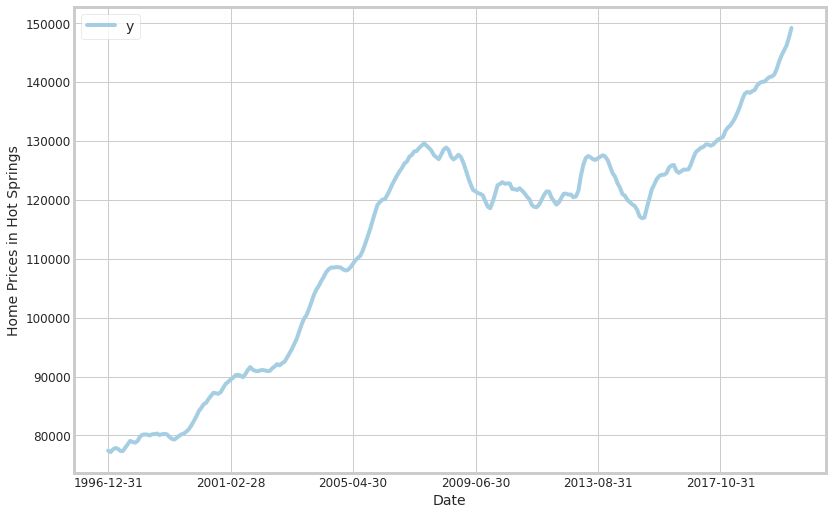

In [223]:
## Hor Springs
plt.figure(figsize=(12,8))
graph_prices_for(hs, "Hot Springs")

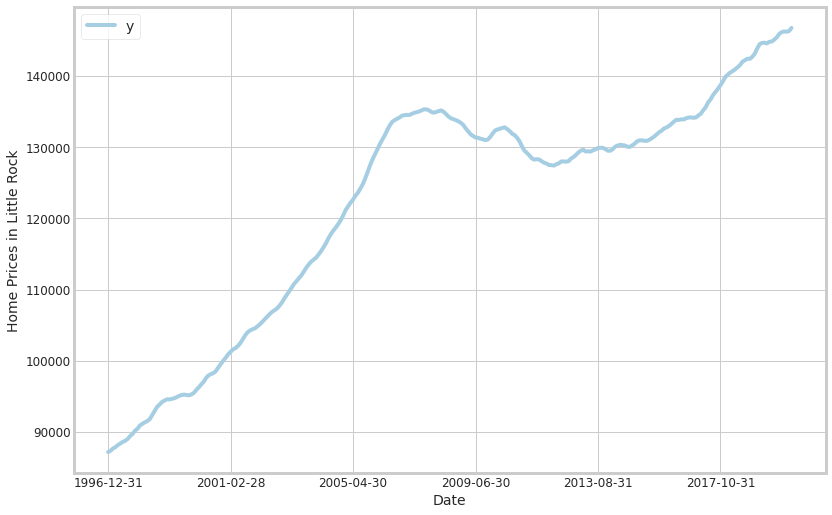

In [224]:
## Little Rock
graph_prices_for(lr, "Little Rock")

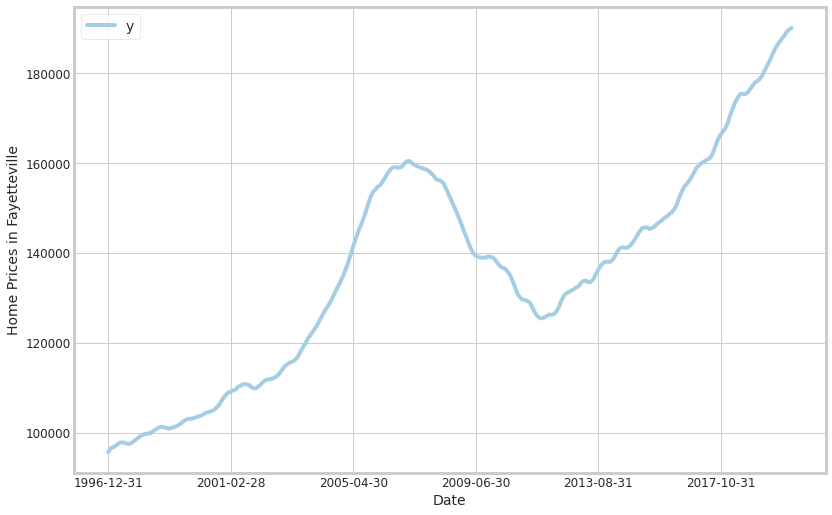

In [225]:
## Fayetteville
graph_prices_for(f, "Fayetteville")

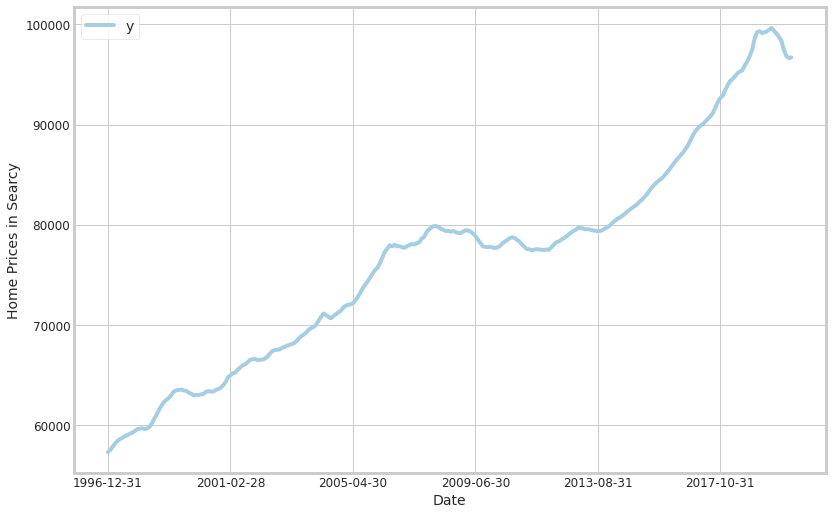

In [226]:
## Searcy
graph_prices_for(s, "Searcy")

In [0]:
def transform(df, location_name):
  df_t = df.loc[:, '1996-12-31'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df['place'] = location_name
  return df

In [0]:
hs_t = transform(hs, 'Hot Springs')
lr_t = transform(lr, 'Little Rock')
f_t = transform(f, 'Fayetteville')
s_t = transform(s, 'Searcy')

In [0]:
all =  hs_t.append([lr_t,f_t,s_t])

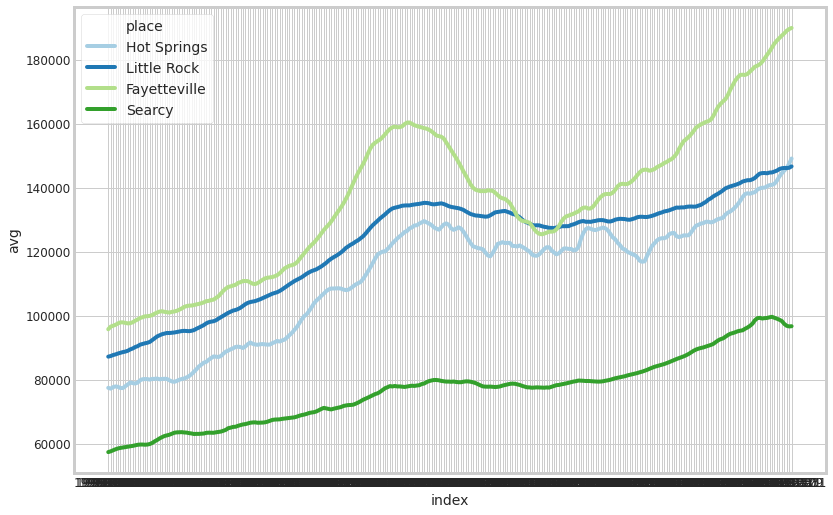

In [230]:


plt.figure(figsize=(12,8))

sns.lineplot(x="index", y="avg", hue="place", data=all)

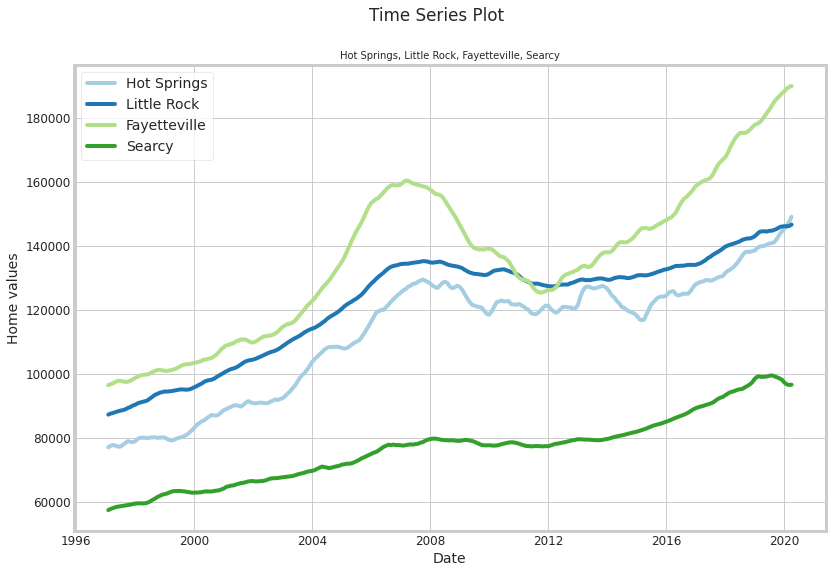

In [231]:
## Better way 
register_matplotlib_converters()
plt.figure(figsize=(12,8))

## Time Series Plot
plt.plot(hs_ts, label='Hot Springs')
plt.plot(lr_ts, label ='Little Rock')
plt.plot(ft_ts, label='Fayetteville')
plt.plot(s_ts, label='Searcy')
plt.legend()

# titles and labels
plt.suptitle('Time Series Plot')
plt.title('Hot Springs, Little Rock, Fayetteville, Searcy', fontsize=10)
plt.ylabel('Home values')
plt.xlabel('Date')

# show overall plot
plt.show();

In [232]:
## EVEN BETTER
ar_homes = df2[df2.State=='AR']

import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_white"

df = pd.DataFrame()
def getMetroAvg(cityName, col):
  global df
  city_homes = ar_homes.loc[ar_homes.City==cityName, col]
  avg = mean(city_homes[~np.isnan( city_homes)])
  df = df.append({'Date':date, 'Avg':avg, 'City':cityName}, ignore_index=True )

for col in ar_homes.columns: 
    date = pd.to_datetime(col, format='%Y-%m', errors='coerce')
    if(date >= pd.to_datetime('01-01-1997')):
      # get metro averages
      getMetroAvg('Hot Springs', col)  
      getMetroAvg('Little Rock', col)  
      getMetroAvg('Fayetteville', col)  
      getMetroAvg('Searcy', col)  

df = df.set_index('Date')

hotSprings_homes = df[df['City']=='Hot Springs']
littleRock_homes = df[df['City']=='Little Rock']
fayetteville_homes = df[df['City']=='Fayetteville']
searcy_homes = df[df['City']=='Searcy']

# Plot results
fig = go.Figure()
fig.add_trace(go.Scatter(x=hotSprings_homes.index, y=hotSprings_homes.Avg, name='Hot Springs',
                          line_color='#FFD166'))
fig.add_trace(go.Scatter(x=littleRock_homes.index, y=littleRock_homes.Avg, name='Little Rock',
                          line_color='purple'))
fig.add_trace(go.Scatter(x=fayetteville_homes.index, y=fayetteville_homes.Avg, name='Fayetteville',
                          ))
fig.add_trace(go.Scatter(x=searcy_homes.index, y=searcy_homes.Avg, name='Searcy',
                          line_color='#073B4C'))
fig.update_layout(title_text='Average Home Sales in AK Metro Areas',
                  xaxis_rangeslider_visible=False)
fig.show()

##### __M__odel

###### PART TWO:

In [233]:
df2.head(3)
df4 =df2.copy()
df4.head()

RegionID  SizeRank    Zip State     City                             Metro  \
1     84654         1  60657    IL  Chicago          Chicago-Naperville-Elgin   
3     91982         3  77494    TX     Katy  Houston-The Woodlands-Sugar Land   
4     84616         4  60614    IL  Chicago          Chicago-Naperville-Elgin   
5     91940         5  77449    TX     Katy  Houston-The Woodlands-Sugar Land   
7     91733         7  77084    TX  Houston  Houston-The Woodlands-Sugar Land   

      CountyName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  \
1    cook county    364892.0    364162.0    363605.0    362963.0    361660.0   
3  harris county    200475.0    200723.0    200526.0    199337.0    198200.0   
4    cook county    546663.0    546231.0    545451.0    545391.0    543066.0   
5  harris county     97521.0     97513.0     97471.0     97491.0     97486.0   
7  harris county     97381.0     97405.0     97330.0     97323.0     97280.0   

   1996-06-30  1996-07-31  1996-08-31  1996-09-30  1996-10-31  1996-11-30  \
1    361342.0    360662.0    361804.0    363561.0    366592.0    370077.0   
3    197534.0    198298.0    197986.0    197333.0    196543.0    197444.0   
4    543084.0    542380.0    545254.0    548142.0    552660.0    557791.0   
5     97458.0     97414.0     97487.0     97621.0     97626.0     97672.0   
7     97261.0     97134.0     97089.0     97111.0     97145.0     97181.0   

   1996-12-31  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  \
1    372842.0    376806.0    380122.0    384081.0    385663.0    389062.0   
3    199129.0    201687.0    202931.0    204207.0    206413.0    208870.0   
4    562238.0    566446.0    569659.0    573409.0    575403.0    581567.0   
5     97755.0     97543.0     97263.0     97003.0     97138.0     97277.0   
7     97205.0     96895.0     96481.0     96141.0     96098.0     96112.0   

   1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  \
1    389359.0    390182.0    388087.0    385729.0    381688.0    377848.0   
3    210582.0    210250.0    212394.0    214904.0    217109.0    216177.0   
4    584316.0    587753.0    585957.0    583932.0    580996.0    578241.0   
5     97514.0     97700.0     97747.0     97753.0     97983.0     98353.0   
7     96101.0     96197.0     96209.0     96207.0     96265.0     96469.0   

   1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  \
1    376493.0    374914.0    375094.0    375012.0    378067.0    380789.0   
3    214468.0    211736.0    210126.0    208420.0    207481.0    206443.0   
4    578355.0    580711.0    585527.0    591659.0    597955.0    604759.0   
5     98624.0     99216.0     99691.0    100179.0    100044.0    100025.0   
7     96676.0     97275.0     97791.0     98282.0     98270.0     98282.0   

   1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  \
1    386605.0    392801.0    400292.0    408057.0    416827.0    425087.0   
3    206033.0    205925.0    204647.0    204133.0    204600.0    206225.0   
4    611702.0    620591.0    630536.0    643350.0    654584.0    665638.0   
5     99914.0     99963.0    100017.0    100156.0    100335.0    100171.0   
7     98292.0     98392.0     98459.0     98548.0     98625.0     98468.0   

   1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  \
1    432120.0    436962.0    441150.0    444482.0    447753.0    450885.0   
3    207084.0    207630.0    208343.0    209594.0    210422.0    211729.0   
4    674824.0    681464.0    686767.0    690649.0    696743.0    700375.0   
5    100043.0    100075.0    100624.0    101366.0    102021.0    102534.0   
7     98328.0     98347.0     98858.0     99612.0    100329.0    100924.0   

   1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  \
1    455497.0    461395.0    467344.0    472584.0    477269.0    482728.0   
3    212988.0    214708.0    215968.0    216236.0    216355.0    216868.0   
4    707488.0    714017.0 

To perform the time series analysis, we need to convert the dataframe into time series format.

- General time series (just for example)

In [0]:
df2=df2.loc[:,'Zip':'2018-12-31']
df2.drop(columns=['City','State','Metro','CountyName','1996-01-31','1996-02-29','1996-03-31','1996-04-30','1996-05-31','1996-06-30','1996-07-31','1996-08-31','1996-09-30', '1996-10-31', '1996-11-30', '1996-12-31'], inplace=True)


In [0]:
df_ts = pd.DataFrame(df2.loc[:,'1997-01-31':'2018-12-31'].mean(), columns=['Price'])
df_ts.index=pd.to_datetime(df_ts.index)

In [236]:
df_ts.head()

Price
1997-01-31  130098.552002
1997-02-28  130498.306260
1997-03-31  130913.061166
1997-04-30  131347.800618
1997-05-31  131788.205491

In [237]:
df_ts.tail()

Price
2018-08-31  306986.966650
2018-09-30  307919.457558
2018-10-31  308763.870912
2018-11-30  309551.609789
2018-12-31  310175.759793

- All zip code time series

In [238]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13913 entries, 1 to 30447
Columns: 265 entries, Zip to 2018-12-31
dtypes: float64(264), object(1)
memory usage: 28.2+ MB


In [239]:
df2.head(6)

Zip  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  \
1  60657    376806.0    380122.0    384081.0    385663.0    389062.0   
3  77494    201687.0    202931.0    204207.0    206413.0    208870.0   
4  60614    566446.0    569659.0    573409.0    575403.0    581567.0   
5  77449     97543.0     97263.0     97003.0     97138.0     97277.0   
7  77084     96895.0     96481.0     96141.0     96098.0     96112.0   
8  79936     82953.0     82909.0     82860.0     83044.0     83059.0   

   1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  \
1    389359.0    390182.0    388087.0    385729.0    381688.0    377848.0   
3    210582.0    210250.0    212394.0    214904.0    217109.0    216177.0   
4    584316.0    587753.0    585957.0    583932.0    580996.0    578241.0   
5     97514.0     97700.0     97747.0     97753.0     97983.0     98353.0   
7     96101.0     96197.0     96209.0     96207.0     96265.0     96469.0   
8     83038.0     82940.0     82964.0     83039.0     83054.0     83064.0   

   1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  \
1    376493.0    374914.0    375094.0    375012.0    378067.0    380789.0   
3    214468.0    211736.0    210126.0    208420.0    207481.0    206443.0   
4    578355.0    580711.0    585527.0    591659.0    597955.0    604759.0   
5     98624.0     99216.0     99691.0    100179.0    100044.0    100025.0   
7     96676.0     97275.0     97791.0     98282.0     98270.0     98282.0   
8     83010.0     83469.0     83936.0     84364.0     84304.0     84290.0   

   1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  \
1    386605.0    392801.0    400292.0    408057.0    416827.0    425087.0   
3    206033.0    205925.0    204647.0    204133.0    204600.0    206225.0   
4    611702.0    620591.0    630536.0    643350.0    654584.0    665638.0   
5     99914.0     99963.0    100017.0    100156.0    100335.0    100171.0   
7     98292.0     98392.0     98459.0     98548.0     98625.0     98468.0   
8     84305.0     84432.0     84537.0     84684.0     84820.0     84966.0   

   1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  \
1    432120.0    436962.0    441150.0    444482.0    447753.0    450885.0   
3    207084.0    207630.0    208343.0    209594.0    210422.0    211729.0   
4    674824.0    681464.0    686767.0    690649.0    696743.0    700375.0   
5    100043.0    100075.0    100624.0    101366.0    102021.0    102534.0   
7     98328.0     98347.0     98858.0     99612.0    100329.0    100924.0   
8     85030.0     84884.0     84901.0     85108.0     85651.0     86133.0   

   1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  \
1    455497.0    461395.0    467344.0    472584.0    477269.0    482728.0   
3    212988.0    214708.0    215968.0    216236.0    216355.0    216868.0   
4    707488.0    714017.0    722142.0    727557.0    734938.0    742457.0   
5    103033.0    103514.0    104007.0    104253.0    104323.0    104531.0   
7    101504.0    102085.0    102708.0    103078.0    103289.0    103571.0   
8     86604.0     87026.0     87397.0     87854.0     88360.0     88962.0   

   1999-12-31  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  \
1    487609.0    494719.0    501675.0    509751.0    516037.0    522884.0   
3    218446.0    220615.0    222483.0    224118.0    225353.0    224566.0   
4    750259.0    759611.0    769515.0    779506.0    787959.0    797980.0   
5    104934.0    105377.0    105549.0    105459.0    105536.0    105582.0   
7    103966.0    104314.0    104367.0    104200.0    104240.0    104278.0   
8     89387.0     89657.0     89673.0     89719.0     89617.0     89611.0   

   2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  \
1    528435.0    534252.0    540262.0    545385.0    550534.0    555476.0   
3    223791.0    222645.0    223148.0    223729.0    224591.0    225722.0   
4    806787.0    816832.0    

In [240]:
## Get one zip code to work
# first one 60657
df2[(df2['Zip']=='60657')]

Zip  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  \
1  60657    376806.0    380122.0    384081.0    385663.0    389062.0   

   1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  \
1    389359.0    390182.0    388087.0    385729.0    381688.0    377848.0   

   1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  \
1    376493.0    374914.0    375094.0    375012.0    378067.0    380789.0   

   1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  \
1    386605.0    392801.0    400292.0    408057.0    416827.0    425087.0   

   1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  \
1    432120.0    436962.0    441150.0    444482.0    447753.0    450885.0   

   1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  \
1    455497.0    461395.0    467344.0    472584.0    477269.0    482728.0   

   1999-12-31  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  \
1    487609.0    494719.0    501675.0    509751.0    516037.0    522884.0   

   2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  \
1    528435.0    534252.0    540262.0    545385.0    550534.0    555476.0   

   2000-12-31  2001-01-31  2001-02-28  2001-03-31  2001-04-30  2001-05-31  \
1    562119.0    568170.0    573485.0    578283.0    584301.0    590710.0   

   2001-06-30  2001-07-31  2001-08-31  2001-09-30  2001-10-31  2001-11-30  \
1    596706.0    599876.0    602535.0    605907.0    610551.0    615389.0   

   2001-12-31  2002-01-31  2002-02-28  2002-03-31  2002-04-30  2002-05-31  \
1    618811.0    621376.0    623951.0    627538.0    630028.0    632219.0   

   2002-06-30  2002-07-31  2002-08-31  2002-09-30  2002-10-31  2002-11-30  \
1    633851.0    637358.0    641671.0    646869.0    651247.0    654117.0   

   2002-12-31  2003-01-31  2003-02-28  2003-03-31  2003-04-30  2003-05-31  \
1    657354.0    661655.0    667259.0    671731.0    675615.0    677975.0   

   2003-06-30  2003-07-31  2003-08-31  2003-09-30  2003-10-31  2003-11-30  \
1    679519.0    681847.0    683516.0    685454.0    687313.0    690349.0   

   2003-12-31  2004-01-31  2004-02-29  2004-03-31  2004-04-30  2004-05-31  \
1    693456.0    696863.0    699686.0    702546.0    706404.0    710605.0   

   2004-06-30  2004-07-31  2004-08-31  2004-09-30  2004-10-31  2004-11-30  \
1    716388.0    719987.0    725568.0    729289.0    734203.0    738410.0   

   2004-12-31  2005-01-31  2005-02-28  2005-03-31  2005-04-30  2005-05-31  \
1    742394.0    745175.0    747289.0    749909.0    753332.0    758258.0   

   2005-06-30  2005-07-31  2005-08-31  2005-09-30  2005-10-31  2005-11-30  \
1    763599.0    770331.0    774453.0    780990.0    785887.0    791690.0   

   2005-12-31  2006-01-31  2006-02-28  2006-03-31  2006-04-30  2006-05-31  \
1    797036.0    801919.0    808507.0    813689.0    817822.0    819215.0   

   2006-06-30  2006-07-31  2006-08-31  2006-09-30  2006-10-31  2006-11-30  \
1    819990.0    820578.0    822835.0    823724.0    825613.0    827190.0   

   2006-12-31  2007-01-31  2007-02-28  2007-03-31  2007-04-30  2007-05-31  \
1    830642.0    834991.0    839632.0    838913.0    832676.0    822457.0   

   2007-06-30  2007-07-31  2007-08-31  2007-09-30  2007-10-31  2007-11-30  \
1    817481.0    813709.0    814399.0    811942.0    813746.0    813588.0   

   2007-12-31  2008-01-31  2008-02-29  2008-03-31  2008-04-30  2008-05-31  \
1    813233.0    815886.0    809620.0    815778.0    823018.0    845605.0   

   2008-06-30  2008-07-31  2008-08-31  2008-09-30  2008-10-31  2008-11-30  \
1    851350.0    856806.0    848552.0    852159.0    843612.0    840997.0   

   2008-12-31  2009-01-31  2009-02-28  2009-03-31  2009-04-30  2009-05-31  \
1    828139.0    815325.0    807622.0    798451.0    792903.0    779800.0   

   2009-06-30  2009-07-31  2009-08-31  2009-09-30  2009-10-31  2009-11-30  \
1    774825.0    773865.0    778198.0    773736.0    774100.0  

In [0]:
# Transpose and make series
def getSeries(df):

  zips = df['RegionID']
  df = df.transpose()

  # drop additional info
  df = df.drop('RegionID')
  df = df.drop('SizeRank')
  df = df.drop('Zip')
  df = df.drop('State')
  df = df.drop('City')
  df = df.drop('Metro')
  df = df.drop('CountyName')

  # make time series
  df.insert(0, 'Date', df.index.values)
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m', errors='coerce')
  df = df.set_index('Date')

  # col names
  cols = ['zip_{0}'.format(z) for z in zips]
  #cols[0] = 'Date'
  df.columns = cols


  # create avg column
  df['zip_median'] = df.median(axis=1)

  # backwards fill for nan values
  df = df.fillna(method='bfill')
  #homes = homes.fillna(method='ffill')

  return df

In [0]:
dfTS= getSeries(df4)
FL = getSeries(df4[df4['State']=='FL'])
NY = getSeries(df4[df4['State']=='NY'])

In [243]:
dfTS.head()

zip_84654  zip_91982  zip_84616  zip_91940  zip_91733  zip_93144  \
Date                                                                           
1996-01-31   364892.0   200475.0   546663.0    97521.0    97381.0    82374.0   
1996-02-29   364162.0   200723.0   546231.0    97513.0    97405.0    82330.0   
1996-03-31   363605.0   200526.0   545451.0    97471.0    97330.0    82300.0   
1996-04-30   362963.0   199337.0   545391.0    97491.0    97323.0    82263.0   
1996-05-31   361660.0   198200.0   543066.0    97486.0    97280.0    82344.0   

            zip_84640  zip_62037  zip_61807  zip_92593  zip_97564  zip_74101  \
Date                                                                           
1996-01-31   254388.0   219465.0   239931.0   144867.0   616693.0   110296.0   
1996-02-29   252774.0   218301.0   239200.0   144705.0   621942.0   110744.0   
1996-03-31   251468.0   217211.0   238902.0   144605.0   625642.0   111127.0   
1996-04-30   248948.0   215847.0   237644.0   144509.0   629519.0   111920.0   
1996-05-31   246695.0   215392.0   237158.0   144543.0   630085.0   112740.0   

            zip_71831  zip_84646  zip_62012  zip_62045  zip_62087  zip_96107  \
Date                                                                           
1996-01-31   109755.0   170128.0   510476.0   230762.0   293530.0   170408.0   
1996-02-29   110669.0   170608.0   511157.0   230155.0   291813.0   170715.0   
1996-03-31   110830.0   171100.0   511756.0   230408.0   290892.0   171065.0   
1996-04-30   111554.0   171895.0   513792.0   231098.0   289045.0   171689.0   
1996-05-31   111591.0   171957.0   513345.0   232541.0   288202.0   172288.0   

            zip_74242  zip_92036  zip_84620  zip_92045  zip_66126  zip_69816  \
Date                                                                           
1996-01-31   110050.0   134785.0   220733.0   138183.0   144172.0   130817.0   
1996-02-29   110378.0   134785.0   220549.0   138336.0   142533.0   130876.0   
1996-03-31   110717.0   134785.0   220433.0   138904.0   141625.0   131044.0   
1996-04-30   111428.0   134785.0   220919.0   139582.0   139416.0   131543.0   
1996-05-31   112133.0   134785.0   220817.0   140240.0   138181.0   132201.0   

            zip_92551  zip_91926  zip_71067  zip_93123  zip_90654  zip_74126  \
Date                                                                           
1996-01-31   166847.0   161268.0    94712.0   124293.0    97847.0    91049.0   
1996-02-29   166368.0   161478.0    95222.0   124084.0    97855.0    91010.0   
1996-03-31   165657.0   161583.0    95625.0   123981.0    97920.0    91059.0   
1996-04-30   164537.0   162037.0    96459.0   123801.0    98047.0    91017.0   
1996-05-31   163449.0   162341.0    97204.0   123879.0    98205.0    91090.0   

            zip_62017  zip_89925  zip_96027  zip_66133  zip_91922  zip_92341  \
Date                                                                           
1996-01-31   182156.0    82758.0   174929.0   214274.0   147105.0   102357.0   
1996-02-29   182512.0    82896.0   175620.0   212640.0   146986.0   102213.0   
1996-03-31   182191.0    83019.0   175745.0   211614.0   146800.0   102048.0   
1996-04-30   181938.0    83277.0   175866.0   210328.0   146717.0   101854.0   
1996-05-31   182245.0    83480.0   175985.0   210536.0   146745.0   101630.0   

            zip_91968  zip_61802  zip_84615  zip_70829  zip_86026  zip_69823  \
Date                                                                           
1996-01-31   199890.0   217085.0   319973.0   117878.0   115258.0   199354.0   
1996-02-29   200350.0   216353.0   320485.0   118075.0   115258.0   199550.0   
1996-03-31   200494.0   215655.0   320531.0   118288.0   115258.0   199982.0   
1996-04-30   200833.0   214308.0   321234.0   118689.0   115258.0   200678.0   
1996-05-31   200928.0   213499.0   321602.0   119100.0   115258.0   201362.0   

            zip_84627  zip_70828  zip_62040  zip_62023  zip_91685  zip_61803  \
Date 

In [244]:
dfTS.shape # added zip_median column

(291, 13914)

In [245]:
## Enumerate and convert for Prophet !!!
dfPR = dfTS.copy()
dfs = []
for i, zip in enumerate(dfPR.columns):
  # add only from the first valid index
  dfs.append(dfPR.loc[dfPR.loc[:,zip].first_valid_index():,zip])
  dfs[i] = dfs[i].to_frame()
  dfs[i].name = zip
  dfs[i]['ds'] = dfs[i].index
  dfs[i].rename(columns={zip: 'y'}, inplace = True)

## Check the first zip
print(dfs[0].name)

zip_84654


In [246]:
FL.head()

zip_71831  zip_72463  zip_73221  zip_72578  zip_72363  zip_72442  \
Date                                                                           
1996-01-31   109755.0   306081.0   151469.0   131678.0   122857.0   442668.0   
1996-02-29   110669.0   304881.0   151382.0   131829.0   123027.0   441973.0   
1996-03-31   110830.0   304401.0   151265.0   131889.0   123281.0   441976.0   
1996-04-30   111554.0   303000.0   150974.0   132002.0   123714.0   440209.0   
1996-05-31   111591.0   301819.0   150585.0   132021.0   124136.0   437354.0   

            zip_71864  zip_72901  zip_72362  zip_73014  zip_71871  zip_71902  \
Date                                                                           
1996-01-31    69831.0   176353.0   104983.0   174713.0    90692.0   162212.0   
1996-02-29    69926.0   176362.0   105298.0   175016.0    90934.0   162407.0   
1996-03-31    70110.0   176644.0   105520.0   175395.0    91202.0   162607.0   
1996-04-30    70422.0   176956.0   105957.0   176319.0    91524.0   163007.0   
1996-05-31    70756.0   177249.0   106295.0   176947.0    91598.0   163289.0   

            zip_73183  zip_72347  zip_71895  zip_72247  zip_73233  zip_72488  \
Date                                                                           
1996-01-31   120531.0    88027.0    81054.0    77348.0    94117.0   131105.0   
1996-02-29   120709.0    88014.0    81143.0    77428.0    93961.0   131204.0   
1996-03-31   120903.0    88136.0    81188.0    77544.0    93836.0   131330.0   
1996-04-30   121176.0    88309.0    81309.0    77738.0    93512.0   131580.0   
1996-05-31   121575.0    88316.0    81360.0    78005.0    93179.0   131831.0   

            zip_72350  zip_71837  zip_72392  zip_72393  zip_72365  zip_72530  \
Date                                                                           
1996-01-31   124723.0   123229.0   100769.0    93431.0   163649.0    71082.0   
1996-02-29   124846.0   123236.0   100887.0    93472.0   163839.0    71093.0   
1996-03-31   125148.0   123295.0   101025.0    93611.0   163990.0    71139.0   
1996-04-30   125649.0   123307.0   101260.0    93839.0   164439.0    71192.0   
1996-05-31   126186.0   123399.0   101474.0    94070.0   164928.0    71208.0   

            zip_72532  zip_72252  zip_71878  zip_72538  zip_72626  zip_73089  \
Date                                                                           
1996-01-31    75373.0   132716.0   104229.0   103050.0   149447.0   122430.0   
1996-02-29    75500.0   132993.0   104279.0   103205.0   149610.0   122034.0   
1996-03-31    75598.0   133279.0   104375.0   103343.0   149714.0   121864.0   
1996-04-30    75837.0   133776.0   104596.0   103650.0   149888.0   121323.0   
1996-05-31    76112.0   134326.0   104777.0   104017.0   150007.0   120871.0   

            zip_72540  zip_71897  zip_72460  zip_72199  zip_72103  zip_72220  \
Date                                                                           
1996-01-31    94445.0    92452.0   136242.0   136247.0   131814.0   105266.0   
1996-02-29    94548.0    92499.0   136374.0   136369.0   132034.0   105222.0   
1996-03-31    94624.0    92607.0   136500.0   136391.0   132231.0   105243.0   
1996-04-30    94760.0    92825.0   136691.0   136519.0   132628.0   105149.0   
1996-05-31    94917.0    93014.0   136948.0   136594.0   132845.0   105179.0   

            zip_72653  zip_399576  zip_72617  zip_72249  zip_71914  zip_72581  \
Date                                                                            
1996-01-31    95029.0     93146.0   156066.0   105461.0    87530.0   163334.0   
1996-02-29    95127.0     92255.0   156343.0   105503.0    87583.0   163466.0   
1996-03-31    95347.0     92007.0   156521.0   105701.0    87680.0   163646.0   
1996-04-30    95596.0     91295.0   156849.0   105989.0    87780.0   164069.0   
1996-05-31    95748.0     90907.0   157072.0   106399.0    87808.0   164483.0   

            zip_72203  zip_72599  zip_72353  zip_72622  zip_72602  zip_73162  

In [0]:
# function to calculate gain percentage (ROI) on previous 2, 5 and 10 years
# source: https://github.com/gioamorim80/Zillow-Time-Series/blob/master/Module%204%20Final%20Project.ipynb
def calculate_gain(ts, plot=True): 
    
    '''Takes a real estate time series and performs calculations on returns over investments
    for periods of 2 and 5 years.'''
    
    # calculates ROI by taking current value, decreasing investment(value at x steps in past) and 
    # dividing by investment. Multiplies by 100 to get percentage number
    roi_2 = (ts - ts.shift(periods=24))/ts.shift(periods=24)*100
    roi_5 = (ts - ts.shift(periods=59))/ts.shift(periods=59)*100
    roi_2.dropna(inplace=True)
    roi_5.dropna(inplace=True)
    
    # plot results
    if plot:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=roi_2.index, y=roi_2.value, name='2-Year Investment',
                                 line_color='deepskyblue'))
        fig.add_trace(go.Scatter(x=roi_5.index, y=roi_5.value, name='5-Year Investment',
                                 line_color='red'))
        fig.update_layout(title_text='Mean Zillow Home Value Index (ZHVI) - ROI Over Time Invested',
                          yaxis_title="ROI (%)", 
                          xaxis_rangeslider_visible=False)
        fig.show()
    
    # saves new ts with returns for 2, 5 and 10 periods
    return roi_2, roi_5

In [0]:
def stationaryTest(df):
  X = df.value
  X = X.astype('float32')

  # Is stationary? Run AD FUller, p-value < .05 ?
  result = adfuller(X)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

  # LOOK FOR ACF & PACF
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
  fig = plot_acf(X, lags=40, ax=ax1)
  ax1.axhline(y=0,linestyle='--',color= 'gray')
  ax1.axhline(y= - 1.96/np.sqrt(len(df)), linestyle='--',color= 'gray')
  ax1.axhline(y=  1.96/np.sqrt(len(df)), linestyle='--',color= 'gray')
  ax1.set_label('Lags')

  fig = plot_pacf(X, lags=40, ax=ax2)
  ax2.axhline(y=0,linestyle = '--', color = 'gray')
  ax2.axhline(y = -1.96/np.sqrt(len(df)), linestyle = '--', color = 'gray')
  ax2.axhline(y = 1.96/np.sqrt(len(df)), linestyle = '--', color = 'gray')
  ax2.set_label('Lags')


##### ***Auto Regressive (AR only) model***

An autoregressive model is when a value from a time series is regressed on previous values from that same time series.

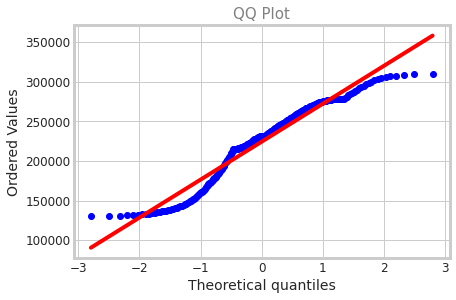

In [249]:
# Check if the time series follow the normal distribution
scipy.stats.probplot(df_ts.Price, plot=pylab)
plt.title("QQ Plot", size = 15, color = 'gray')
pylab.show()

A Q-Q plot stands for a "quantile-quantile plot". It is a plot where the axes are purposely transformed in order to make a normal (or Gaussian) distribution appear in a straight line. In other words, a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0. In this case, the time series is not following a normal distribution.

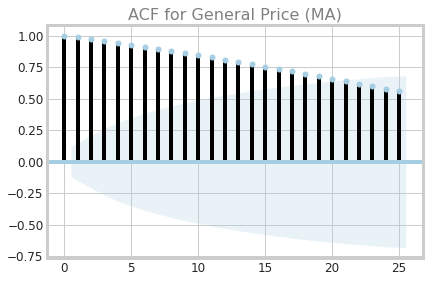

In [250]:
# ACF plot
plot_acf(df_ts);
plt.title('ACF for General Price (MA)', size =16, color = "gray")
plt.show() # it is decreasing

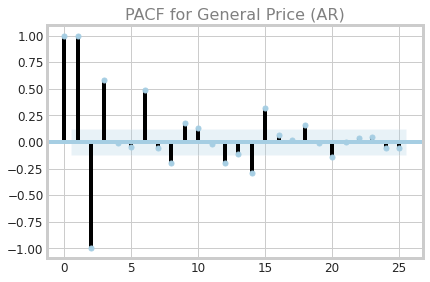

In [251]:
# PACF plot
plot_pacf(df_ts, method='ols');
plt.title('PACF for General Price (AR)', size=16, color = "gray")
plt.show()

The firt 4 are significan, we can use general time series. The trend in the series have to be removed. 

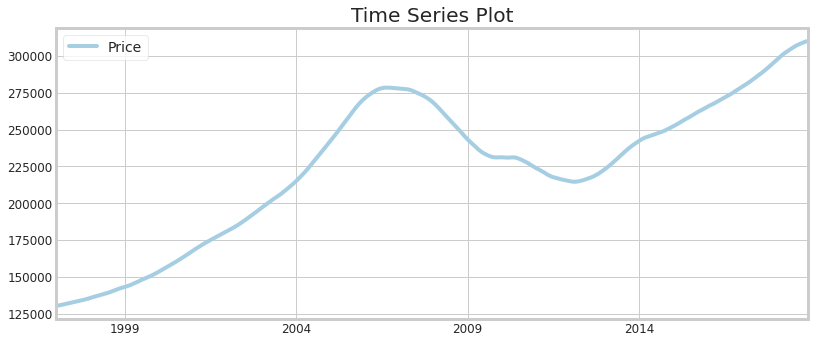

In [252]:
from matplotlib import pyplot
df_ts.plot(figsize=(12,5), title='Time Series Plot')
pyplot.show()

In [253]:
## Check the stationarity
# Define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_ts.Price) #squeeze to get rid of 1 dimension


Results of Dickey-Fuller Test:
Test Statistic                  -1.906227
p-value                          0.329137
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.
AR model does not work vary well on non-stataionary time series.

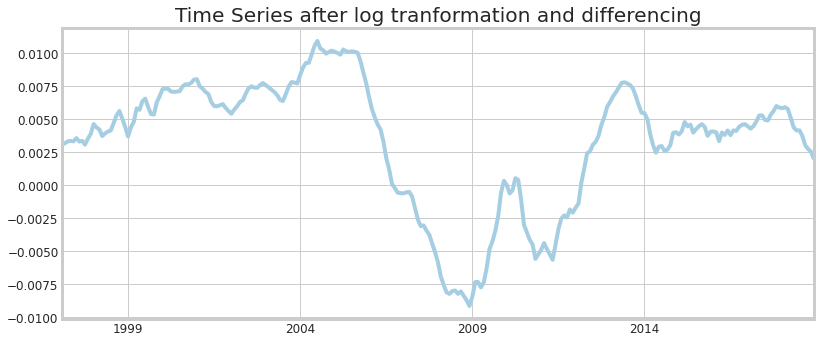

In [254]:
# Differencing 
df_ts.Price_log = np.log(df_ts.Price)
df_ts.Price_logd = df_ts.Price_log - df_ts.Price_log.shift(1)
df_ts.Price_logd.dropna().plot(figsize=(12,5), title = 'Time Series after log tranformation and differencing')


In [255]:
adf_test(df_ts.Price_logd.dropna()) #still not stationary

Results of Dickey-Fuller Test:
Test Statistic                  -2.260377
p-value                          0.185066
#Lags Used                      16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [256]:
## With the logged 
shift_1=df_ts.Price_log.shift(1)
AR_df2=pd.concat([df_ts.Price_log,shift_1], axis=1)
AR_df2=AR_df2[1:]
AR_df2.columns=['Actual_Price','Forecaset_Price']
mse = mean_squared_error(AR_df2.Actual_Price,AR_df2.Forecaset_Price)
rmse=sqrt(mse)
print('The baseline RMSE: {:.3f}'.format(rmse))

The baseline RMSE: 0.006


In [257]:
##  With the regular
shift_2=df_ts.shift(1)
AR_df3=pd.concat([df_ts,shift_2], axis=1)
AR_df3=AR_df3[1:]
AR_df3.columns=['Actual_Price','Forecaset_Price']
mse = mean_squared_error(AR_df3.Actual_Price,AR_df3.Forecaset_Price)
rmse=sqrt(mse)
print('The baseline RMSE: {:.3f}'.format(rmse))

The baseline RMSE: 1319.459


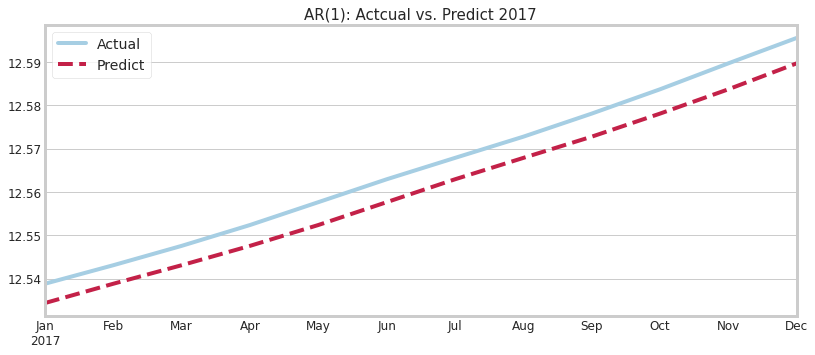

In [258]:
AR_df2.Actual_Price[1:]['2017'].plot(figsize=(12,5), label='Actual');
AR_df2.Forecaset_Price['2017'].plot(figsize=(12,5), label='Predict', color='#C32148', style='--');
plt.title('AR(1): Actcual vs. Predict 2017', size=15)
plt.legend()
plt.show()

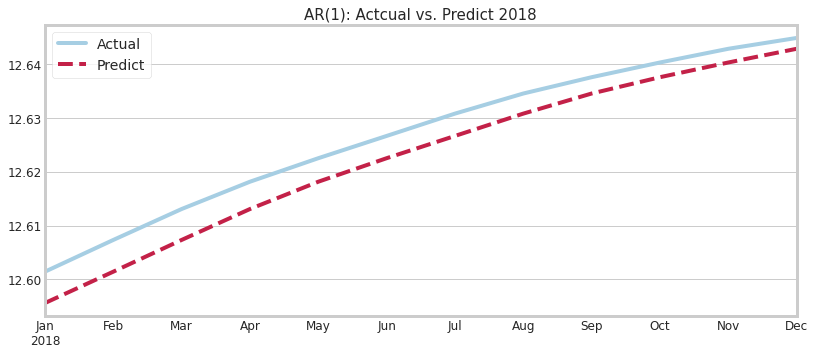

In [259]:
AR_df2.Actual_Price[1:]['2018'].plot(figsize=(12,5), label='Actual');
AR_df2.Forecaset_Price['2018'].plot(figsize=(12,5), label='Predict', color='#C32148', style='--');
plt.title('AR(1): Actcual vs. Predict 2018', size=15)
plt.legend()
plt.show()

In [0]:
## Automation of Testing
# Combine it all in one function
def adf_test(timeseries_df):
    print('\tZipcode: {}\n'.format(timeseries_df.columns[0]))

    # Plotting
    timeseries_df.plot(title='Time Series Plot', figsize=(8,5));
    plt.show()
    timeseries_df.hist(figsize=(8,5));
    plt.title('Histogram')
    plt.show()
    timeseries_df.boxplot(flierprops= {'marker':'D', 'markerfacecolor':'g'}, figsize=(8,5), vert=False); 
    plt.title('Box Plot')
    plt.show()
    scipy.stats.probplot(timeseries_df.squeeze(), plot=pylab); #squeeze to get rid of 1 dimension
    plt.title("QQ Plot", size = 12)
    pylab.show()

    # Statistics
    print('Central of tendency:')
    print('{:10}: {}'.format('Mean', timeseries_df.mean()[0]))
    print('{:10}: {}'.format('Median', timeseries_df.median()[0]))
    
    # Augmented Dickey-Fuller unit root test
    adf_test = adfuller(pd.Series(timeseries_df.squeeze())) #squeeze to get rid of 1 dimension
    print('\nADF Statistic: {:.6f}'.format(adf_test[0]) )
    print('p-value: {:.6f}'.format(adf_test[1]))
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t{:>3s}: {:.3f}'.format(key, value))   

    if adf_test[1] <= 0.05:
        print("\n** Reject the null hypothesis. Data has no unit root and is stationary **")
    else:
        print("\n** Fail to reject the null hypothesis. Data has unit root and is non-stationary **")

	Zipcode: zip_71831



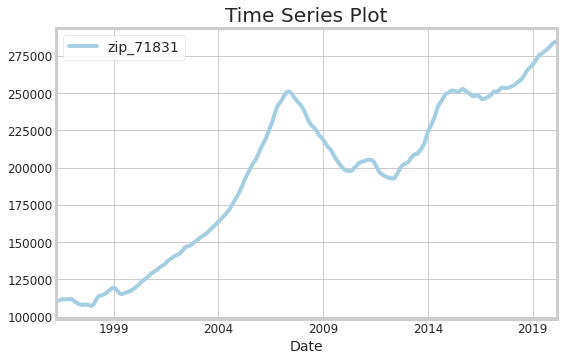

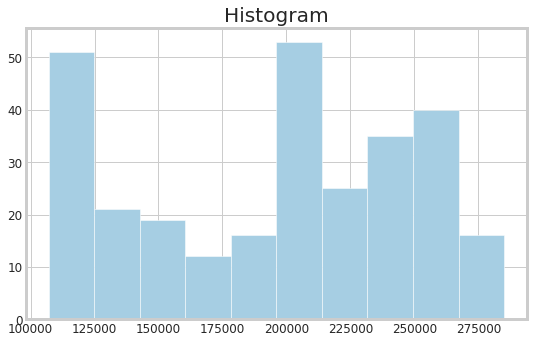

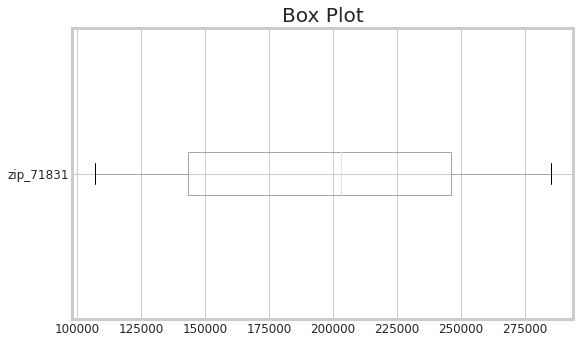

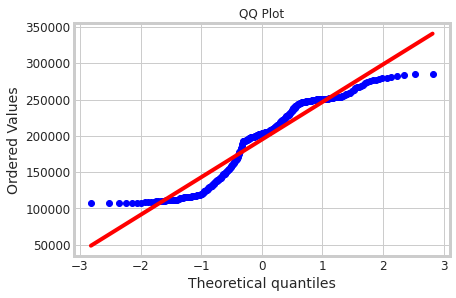

Central of tendency:
Mean      : 194734.48611111112
Median    : 203204.0

ADF Statistic: -1.379902
p-value: 0.591873
Critical Values:
	 1%: -3.455
	 5%: -2.872
	10%: -2.572

** Fail to reject the null hypothesis. Data has unit root and is non-stationary **


In [261]:
adf_test(dfTS[['zip_71831']].shift(3)[3:])

##### ***ARIMA model***

- compare the models for individual zip codes

In [262]:
## Build train and test set
train = df_ts['1997':'2017']
print('Train shape: {}'.format(train.shape))
test = df_ts['2018']
print('Train shape: {}'.format(test.shape))
start_date = '2018-01-31'
end_date = '2018-12-31'

Train shape: (252, 1)
Train shape: (12, 1)


In [263]:
"""from pandas.plotting import autocorrelation_plot
# Get the quterly numbers
df_ts_q = df_ts.resample('Q').mean()
df_ts_q.head()
autocorrelation_plot(df_ts_q)
pyplot.show()

# p value 11-12"""

"from pandas.plotting import autocorrelation_plot\n# Get the quterly numbers\ndf_ts_q = df_ts.resample('Q').mean()\ndf_ts_q.head()\nautocorrelation_plot(df_ts_q)\npyplot.show()\n\n# p value 11-12"

In [264]:
## Build parameters for grid search
import itertools
p_values=range(0,12)
d_values=range(0,3)
q_values=range(0,3)
pdq=list(itertools.product(p_values,d_values,q_values))
len(pdq)

108

In [0]:
#from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(df_ts_q, lags=15) # q value is 2"""

In [266]:
"""import warnings
from math import sqrt
warnings.filterwarnings('ignore')

best_score=None
for parameter in pdq:
    try:
        model_arima = ARIMA(train, order=parameter)
        model_arima_fit=model_arima.fit(disp=0)
        predictions = model_arima_fit.forecast(steps=len(test))[0]
#        predictions = model_arima_fit.predict(start= start_date, end= end_date) # store only the predictions
        mse=mean_squared_error(test, predictions)
      
        rmse = sqrt(mse)
        print('ARIMA{}, RMSE={}'.format(parameter,round(rmse,4)))
    except:
        continue"""

ARIMA(0, 0, 0), RMSE=84111.1605
ARIMA(0, 0, 1), RMSE=82176.2955
ARIMA(0, 1, 0), RMSE=5440.17
ARIMA(0, 1, 1), RMSE=4827.0663
ARIMA(0, 2, 0), RMSE=2892.0899
ARIMA(0, 2, 1), RMSE=2676.5865
ARIMA(0, 2, 2), RMSE=2654.7135
ARIMA(1, 0, 0), RMSE=10228.1356
ARIMA(1, 1, 0), RMSE=2444.6353
ARIMA(1, 1, 1), RMSE=2159.0987
ARIMA(1, 1, 2), RMSE=2345.6806
ARIMA(1, 2, 0), RMSE=2617.1644
ARIMA(1, 2, 1), RMSE=2617.29
ARIMA(1, 2, 2), RMSE=2852.0302
ARIMA(2, 0, 0), RMSE=949.8149
ARIMA(2, 0, 1), RMSE=724.0929
ARIMA(2, 0, 2), RMSE=265.7712
ARIMA(2, 1, 0), RMSE=1763.5319
ARIMA(2, 1, 1), RMSE=1767.7878
ARIMA(2, 1, 2), RMSE=2476.6056
ARIMA(2, 2, 0), RMSE=2617.2711
ARIMA(2, 2, 1), RMSE=2736.0088
ARIMA(2, 2, 2), RMSE=2797.1504
ARIMA(3, 0, 1), RMSE=444.4418
ARIMA(3, 0, 2), RMSE=942.4622
ARIMA(3, 1, 1), RMSE=1820.1878
ARIMA(3, 1, 2), RMSE=2041.7509
ARIMA(3, 2, 0), RMSE=2506.0289
ARIMA(3, 2, 1), RMSE=2457.3711
ARIMA(3, 2, 2), RMSE=2779.3413
ARIMA(4, 0, 0), RMSE=439.3048
ARIMA(4, 0, 1), RMSE=478.9742
ARIMA(4, 0, 2), 

In [0]:
## Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [0]:
# Build a Automation of ARIMA validation for the following models
def ARIMA_validation(AR, I, MA, training_set, test_set):
    
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.graphics.tsaplots import plot_acf
    from statsmodels.graphics.tsaplots import plot_pacf
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import pandas as pd
    import matplotlib.pyplot as plt

    arima_order = (AR,I,MA)
    print('ARIMA{}\n'.format(arima_order))

    # ACF plot
    plot_acf(training_set);
    plt.title('ACF for General Price (MA)', size =15)
    plt.show()

    # PACF plot
    plot_pacf(training_set, method='ols');
    plt.title('PACF for General Price (AR)', size=15)
    plt.show()

    # ARIMA model
    model_arima = ARIMA(training_set, order=arima_order)
    model_arima_fit=model_arima.fit(disp=0)
    #predictions = model_arima_fit.forecast(steps=len(test))[0]
    predictions = model_arima_fit.predict(start= start_date, end = end_date)

    # RMSE
    mse=mean_squared_error(test_set, predictions)
    rmse = sqrt(mse)
    print('{:5}: {}'.format('RMSE', round(rmse,4)))

    # Plotting
    test_set.plot(figsize=(12,5), label='Actual');
    predictions.plot(figsize=(12,5), label='Predict', color='#C32148', style='--');
    plt.title('Actcual vs. Predicted', size=15)
    plt.legend()
    plt.show()

    # Summary
    print(model_arima_fit.summary())

    # Residual 
    model_arima_fit.resid.plot(title='Line Plot of the Residual Errors')
    plt.show()
    model_arima_fit.resid.plot(kind='kde', title='Density Plot of the Residual Errors')
    plt.show()
    print('Residual Errors Statistics:') 
    print(model_arima_fit.resid.describe()) 

ARIMA(4, 0, 1)



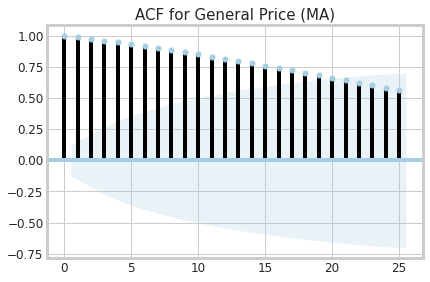

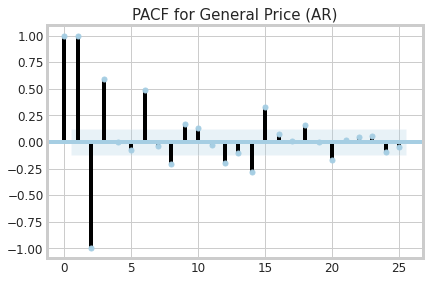

RMSE : 478.9742


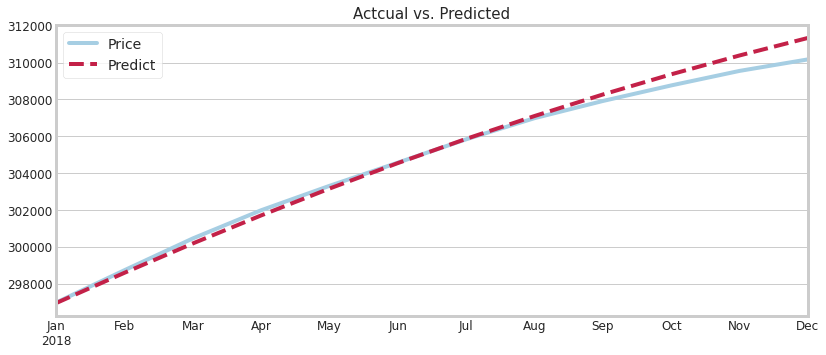

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  252
Model:                     ARMA(4, 1)   Log Likelihood               -1520.480
Method:                       css-mle   S.D. of innovations             97.299
Date:                Sat, 09 May 2020   AIC                           3054.960
Time:                        12:50:57   BIC                           3079.666
Sample:                    01-31-1997   HQIC                          3064.901
                         - 12-31-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.206e+05   2.54e+04      8.673      0.000    1.71e+05     2.7e+05
ar.L1.Price     1.8252      0.007    252.144      0.000       1.811       1.839
ar.L2.Price    -0.1363        nan        nan    

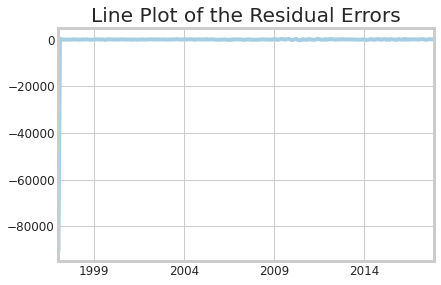

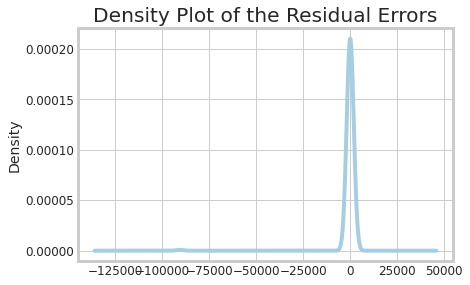

Residual Errors Statistics:
count      252.000000
mean      -351.370318
std       5702.486838
min     -90502.585178
25%        -46.595125
50%          3.026638
75%         61.139497
max        373.372489
dtype: float64


In [269]:
# prediction
ARIMA_validation(4,0,1, train, test)

- for all zip codes

In [74]:
## Create train and test 
train = dfTS['1997':'2017']
print('Train shape: {}'.format(train.shape))
test = dfTS['2018']
print('Test shape: {}'.format(test.shape))
start_date = '2018-01-31'
end_date = '2018-12-31'

Train shape: (252, 13914)
Test shape: (12, 13914)


In [0]:
zipcode=[]
RMSE=[]
for i, z in enumerate(tuple(dfTS.columns), start = 1):
    try:
        zip_train = train.loc[:,z]
        zip_test = test.loc[:,z]
        # ARIMA model
        model_arima = ARIMA(zip_train, order=(4,0,1))
        model_arima_fit=model_arima.fit(disp=0)
        #predictions = model_arima_fit.forecast(steps=len(test))[0]
        predictions = model_arima_fit.predict(start= start_date, end = end_date)

        # RMSE
        mse=mean_squared_error(zip_test, predictions)
        rmse = sqrt(mse)
        zipcode.append(z)
        RMSE.append(rmse)
        print('{}. Zipcode:{}, RMSE={}'.format(i, z,round(rmse,4)))
    except:
        continue

1. Zipcode:zip_84654, RMSE=16198.7279
2. Zipcode:zip_91982, RMSE=782.9635
3. Zipcode:zip_84616, RMSE=3954.0115
6. Zipcode:zip_93144, RMSE=2834.9813
7. Zipcode:zip_84640, RMSE=2476.0879
9. Zipcode:zip_61807, RMSE=26501.3564
13. Zipcode:zip_71831, RMSE=7628.9784
14. Zipcode:zip_84646, RMSE=3414.4779
15. Zipcode:zip_62012, RMSE=20085.3431
16. Zipcode:zip_62045, RMSE=3471.6728
17. Zipcode:zip_62087, RMSE=55121.8154
18. Zipcode:zip_96107, RMSE=8711.2225
21. Zipcode:zip_84620, RMSE=4299.2756
22. Zipcode:zip_92045, RMSE=7072.1051
23. Zipcode:zip_66126, RMSE=13320.2564
24. Zipcode:zip_69816, RMSE=5609.7557
27. Zipcode:zip_71067, RMSE=1872.8322
28. Zipcode:zip_93123, RMSE=3947.2812
30. Zipcode:zip_74126, RMSE=3653.8716
32. Zipcode:zip_89925, RMSE=2408.3401
34. Zipcode:zip_66133, RMSE=9247.8922
37. Zipcode:zip_91968, RMSE=4121.7294
38. Zipcode:zip_61802, RMSE=36854.6854
39. Zipcode:zip_84615, RMSE=17135.4852
40. Zipcode:zip_70829, RMSE=8941.3028
41. Zipcode:zip_86026, RMSE=5748.7554
42. Zipcode:

In [1]:
ZIP.models = pd.DataFrame({'ZipCode':zipcode,'RMSE': RMSE})
ZIP.models.sort_values("RMSE", axis = 0, ascending = True, 
                 inplace = True)
ZIP.models.to_csv('Big_data_ZIP.models.csv', index=False)
ZIP.models.shape

NameError: ignored

In [0]:
# zip_models = pd.read_csv('/content/drive/My Drive/df_zip_models.csv')

In [0]:
zip_models.head()

In [0]:
## Normalize
zip_models=zip_models.astype({'ZipCode':str}) 
zip_models['ZipCode']=zip_models['ZipCode'].apply(normalize_zipcode)

##### ***SARIMA***

In [0]:
## Function to calculate gain percentage (ROI) on previous 2, 5 and 10 years
# source: https://github.com/gioamorim80/Zillow-Time-Series/blob/master/Module%204%20Final%20Project.ipynb
def calculate_gain(ts, plot=True): 
    
    '''Takes a real estate time series and performs calculations on returns over investments
    for periods of 2 and 5 years.'''
    
    # calculates ROI by taking current value, decreasing investment(value at x steps in past) and 
    # dividing by investment. Multiplies by 100 to get percentage number
    roi_2 = (ts - ts.shift(periods=24))/ts.shift(periods=24)*100
    roi_5 = (ts - ts.shift(periods=59))/ts.shift(periods=59)*100
    roi_2.dropna(inplace=True)
    roi_5.dropna(inplace=True)
    
    # plot results
    if plot:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=roi_2.index, y=roi_2.value, name='2-Year Investment',
                                 line_color='deepskyblue'))
        fig.add_trace(go.Scatter(x=roi_5.index, y=roi_5.value, name='5-Year Investment',
                                 line_color='red'))
        fig.update_layout(title_text='Mean Zillow Home Value Index (ZHVI) - ROI Over Time Invested',
                          yaxis_title="ROI (%)", 
                          xaxis_rangeslider_visible=False)
        fig.show()
    
    # saves new ts with returns for 2, 5 and 10 periods
    return roi_2, roi_5

In [0]:
def stationaryTest(df):
  X = df.value
  X = X.astype('float32')

  # Is stationary? Run AD FUller, p-value < .05 ?
  result = adfuller(X)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

  # LOOK FOR ACF & PACF
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
  fig = plot_acf(X, lags=40, ax=ax1)
  ax1.axhline(y=0,linestyle='--',color= 'gray')
  ax1.axhline(y= - 1.96/np.sqrt(len(df)), linestyle='--',color= 'gray')
  ax1.axhline(y=  1.96/np.sqrt(len(df)), linestyle='--',color= 'gray')
  ax1.set_label('Lags')

  fig = plot_pacf(X, lags=40, ax=ax2)
  ax2.axhline(y=0,linestyle = '--', color = 'gray')
  ax2.axhline(y = -1.96/np.sqrt(len(df)), linestyle = '--', color = 'gray')
  ax2.axhline(y = 1.96/np.sqrt(len(df)), linestyle = '--', color = 'gray')
  ax2.set_label('Lags')

ADF Statistic: -1.415737
p-value: 0.574709


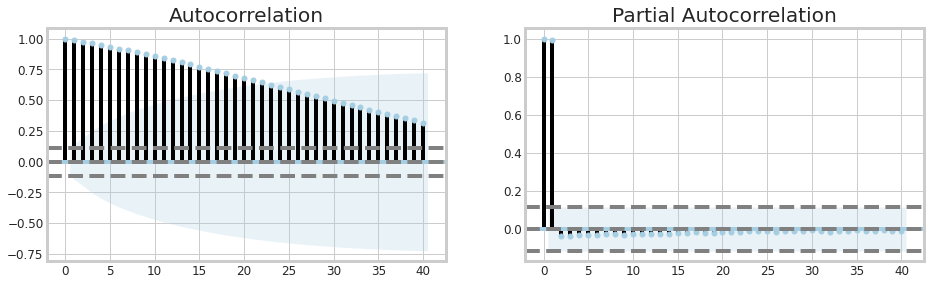

In [272]:
df = pd.DataFrame(data=dfTS['zip_median'].values, index=dfTS.index, columns=['value'])
stationaryTest(df) # p-value: 0.574709

The data set is not stationary.

In [273]:
df.head(4)

value
Date                
1996-01-31  108343.5
1996-02-29  107881.5
1996-03-31  107780.5
1996-04-30  107893.5

In [274]:
calculate_gain(df, plot=True)

(                value
 Date                 
 1998-01-31   5.042758
 1998-02-28   5.873574
 1998-03-31   6.255770
 1998-04-30   6.459611
 1998-05-31   6.735002
 1998-06-30   6.990887
 1998-07-31   7.251640
 1998-08-31   7.330889
 1998-09-30   7.585425
 1998-10-31   7.854978
 1998-11-30   7.943756
 1998-12-31   8.162406
 1999-01-31   8.046071
 1999-02-28   8.159776
 1999-03-31   8.260120
 1999-04-30   8.599611
 1999-05-31   8.685965
 1999-06-30   8.747742
 1999-07-31   8.994766
 1999-08-31   9.237999
 1999-09-30   9.301166
 1999-10-31   9.400107
 1999-11-30   9.610371
 1999-12-31   9.749746
 2000-01-31   9.904487
 2000-02-29  10.054457
 2000-03-31  10.274792
 2000-04-30  10.438522
 2000-05-31  10.679367
 2000-06-30  10.800616
 2000-07-31  10.843810
 2000-08-31  11.055147
 2000-09-30  11.137946
 2000-10-31  11.288314
 2000-11-30  11.356223
 2000-12-31  11.570017
 2001-01-31  11.969210
 2001-02-28  12.086508
 2001-03-31  12.366597
 2001-04-30  12.069195
 2001-05-31  12.160749
 2001-06-30

In [81]:

"""# Get fuller p-values for different lags

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# Make stationary
X = zip_median_roi5.value
X = X.astype('float32')

# difference data

for p in range(0, 40):
  lags = p
  stationary = difference(X, lags)
  result = adfuller(stationary)
  if result[1] < .05:
    print('lags: ' + str(p) + ', p-value: ' + str(result[1]))

#lags: 1, p-value: 0.067"""


"# Get fuller p-values for different lags\n\n# create a differenced series\ndef difference(dataset, interval=1):\n\tdiff = list()\n\tfor i in range(interval, len(dataset)):\n\t\tvalue = dataset[i] - dataset[i - interval]\n\t\tdiff.append(value)\n\treturn Series(diff)\n \n# Make stationary\nX = zip_median_roi5.value\nX = X.astype('float32')\n\n# difference data\n\nfor p in range(0, 40):\n  lags = p\n  stationary = difference(X, lags)\n  result = adfuller(stationary)\n  if result[1] < .05:\n    print('lags: ' + str(p) + ', p-value: ' + str(result[1]))\n\n#lags: 1, p-value: 0.067"

In [84]:
"""
# make stationary with lag = 1, as discovered to be best with AD Fuller test
lags = 1
stationary = difference(X, lags)
stationary.index = df.index[lags:]

# USING STATIONARY TIME SERIES LOOK FOR ACF & PACF
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
fig = plot_acf(stationary, ax=ax1)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(stationary)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(stationary)), linestyle='--',color= 'gray')
ax1.set_label('Lags')

fig = plot_pacf(stationary, ax=ax2)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(stationary)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(stationary)), linestyle = '--', color = 'gray')
ax2.set_label('Lags')"""


"\n# make stationary with lag = 1, as discovered to be best with AD Fuller test\nlags = 1\nstationary = difference(X, lags)\nstationary.index = df.index[lags:]\n\n# USING STATIONARY TIME SERIES LOOK FOR ACF & PACF\nfig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))\nfig = plot_acf(stationary, ax=ax1)\nax1.axhline(y=0,linestyle='--',color= 'gray')\nax1.axhline(y= - 1.96/np.sqrt(len(stationary)), linestyle='--',color= 'gray')\nax1.axhline(y=  1.96/np.sqrt(len(stationary)), linestyle='--',color= 'gray')\nax1.set_label('Lags')\n\nfig = plot_pacf(stationary, ax=ax2)\nax2.axhline(y=0,linestyle = '--', color = 'gray')\nax2.axhline(y = -1.96/np.sqrt(len(stationary)), linestyle = '--', color = 'gray')\nax2.axhline(y = 1.96/np.sqrt(len(stationary)), linestyle = '--', color = 'gray')\nax2.set_label('Lags')"

In [87]:

"""# BEST ARIMA params
# CODE RUNS LONG FOR EVALUATION - approximately 1 hour!!!! don`t run it
import warnings

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.70)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		lags = 1 # best value discovered with fuller test above
		diff = difference(history, lags)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, lags)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)

warnings.filterwarnings("ignore")
evaluate_models(dfTS['zip_median'].values, p_values, d_values, q_values)

# Best: ARIMA(1, 1, 1) RMSE=188,186
"""

ARIMA(0, 0, 1) RMSE=540.661
ARIMA(0, 0, 2) RMSE=405.895
ARIMA(0, 0, 3) RMSE=344.584
ARIMA(0, 0, 4) RMSE=299.222
ARIMA(0, 0, 5) RMSE=281.668
ARIMA(0, 0, 6) RMSE=266.589
ARIMA(0, 1, 1) RMSE=189.779
ARIMA(0, 1, 2) RMSE=189.427
ARIMA(0, 1, 3) RMSE=192.700
ARIMA(0, 1, 4) RMSE=192.513
ARIMA(0, 1, 5) RMSE=191.297
ARIMA(0, 1, 6) RMSE=188.881
ARIMA(0, 2, 1) RMSE=214.571
ARIMA(1, 0, 0) RMSE=213.945
ARIMA(1, 0, 1) RMSE=190.417
ARIMA(1, 0, 2) RMSE=189.958
ARIMA(1, 0, 3) RMSE=193.337
ARIMA(1, 0, 4) RMSE=193.069
ARIMA(1, 0, 5) RMSE=191.664
ARIMA(1, 0, 6) RMSE=189.117
ARIMA(1, 1, 0) RMSE=189.291
ARIMA(1, 1, 1) RMSE=188.186
ARIMA(1, 1, 2) RMSE=190.344
ARIMA(1, 2, 0) RMSE=259.799
ARIMA(2, 0, 0) RMSE=189.700
ARIMA(2, 0, 1) RMSE=188.734
ARIMA(2, 0, 2) RMSE=190.946
ARIMA(2, 1, 0) RMSE=188.601
ARIMA(2, 1, 1) RMSE=189.998
ARIMA(2, 1, 2) RMSE=190.797
ARIMA(2, 1, 3) RMSE=191.254
ARIMA(2, 2, 0) RMSE=241.475
ARIMA(2, 2, 1) RMSE=196.178
ARIMA(2, 2, 2) RMSE=196.664
ARIMA(2, 2, 3) RMSE=192.181
ARIMA(3, 0, 0) RMSE=

In [0]:
## Define a function to run auto arima and search for best model parameters
def find_orders(ts, exog=None):

    stepwise_model = pm.auto_arima(ts, start_p=1, start_q=1, max_p=4, max_q=14,
                                exogenous=exog, 
                                m=12, seasonal=True, stationary=False,
                                stepwise=True, trend='ct',
                                suppress_warnings=True, trace=False, 
                                error_action='ignore')

    return stepwise_model.order, stepwise_model.seasonal_order

In [0]:
def fit_sarimax_model(ts, exog=None, order=(1,1,1), seasonal_order=(0, 0, 0, 12), summary=True, plot=True):
  
    # fit model with exog
    model = sm.tsa.statespace.SARIMAX(ts, 
                                  exog = exog,  
                                  order=order,
                                  seasonal_order=seasonal_order,
                                  trend='ct',
                                  enforce_stationarity=True,
                                  enforce_invertibility=False)

    output = model.fit(d=0)
    
    if summary==True:
        print(output.summary())

    if plot==True:
        # plot model diagnostics
        output.plot_diagnostics(figsize=(15, 18))
        plt.show()
        
    return output

In [0]:
def get_predictions(test, exog, model_output, plot=True, show=True):
    
    # Use the model to forecast twelve months into 2018 and store the confidence intervals
    pred = model_output.get_prediction(start=pd.to_datetime('2018-01-31'), end=pd.to_datetime('2018-12-31'), dynamic=False, exog=exog)
    pred_ci = pred.conf_int()
    
    # Plot the actual results for 2018 vs the projected results. 
    ax = test['2018-01-01':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8,6))
    
    
    if plot:
        #Plot observed and predicted values with confidence interval
        ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

        ax.set_xlabel('Date')
        ax.set_ylabel('Household Value')
        plt.legend(loc='upper left')
        plt.show()

    
    if show:
        
        # Obtain the predicted mean, merge with the actual values, and compute the MSE. 
        y_pred = pred.predicted_mean.reset_index()
        y_pred.columns = ['date', 'value']
        
        y_test = test.reset_index()
        
        # Compute the mean square error / RMSE
        mse = mean_squared_error(y_test.value, y_pred.value)
        rmse = math.sqrt(mse)
        r2 = r2_score(y_test.value, y_pred.value)

        # Print the results. 
        print('RMSE: ' +  str(format(round(rmse, 3))))
        print('R-squared: ' + str(format(round(r2, 3))))



In [0]:
def get_future(ds, plot):

    # Get forecast and confidence interval from base model, by steps 60
    
    future_2y = model_output.get_forecast(steps=24, dynamic=True)
    future_conf_2y = future_2y.conf_int(steps=24)

    future_5y = model_output.get_forecast(steps=60, dynamic=True)
    future_conf_5y = future_5y.conf_int(steps=60)    

    if plot: # plot results

        # 5 yr
        ax = ds.plot(label='Observed', figsize=(12, 8))
        future_5y.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(future_conf_5y.index,
                        future_conf_5y.iloc[:, 0],
                        future_conf_5y.iloc[:, 1], color='k', alpha=.25)
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.set_title('5-Year Forecast')
        ax.legend()
        plt.show()        

    df_out = future_conf_5y
    df_out['yhat'] = future_5y.predicted_mean
    df_out.columns = ['yhat_lower', 'yhat_upper', 'yhat']


    gain_df = pd.DataFrame({'value':df_out['yhat'].values, 'date':df_out.index})
    gain_df = gain_df.set_index('date')
    #gain_df.loc['2025-01'] = 0

    roi = calculate_gain(gain_df, plot=False)
    roi_2y = pd.DataFrame(roi[0])
    roi_5y = pd.DataFrame(roi[1])
    roi_2y.index = pd.date_range(start='1/1/2022', periods=36, freq='M')
    roi_5y.index = pd.date_range(start='12/1/2024', periods=1, freq='M')

    #print('2-Year ROI: ' + str(roi_2y.loc['2022-01'].value[0]) + '%')
    #print('5-Year ROI: ' + str(roi_5y.loc['2024-12'].value[0]) + '%')

    # show prediction for end of step-period
    maximum_2y = future_conf_2y.iloc[-1,1]
    minimum_2y = future_conf_2y.iloc[-1,0]    
    maximum_5y = future_conf_5y.iloc[-1,1]
    minimum_5y = future_conf_5y.iloc[-1,0]

    #return (df_out) # returns predicted values
    return (pd.DataFrame({'roi_2y':roi_2y.loc['2022-01'].value[0], 
                          'min_conf_2y': minimum_2y, 
                          'max_conf_2y': maximum_2y, 
                          'roi_5y':roi_5y.loc['2024-12'].value[0], 
                          'min_conf_5y': minimum_5y, 
                          'max_conf_5y': maximum_5y, 
                          }, index=[0]))

##### ***Base Model***

In [277]:
"""## Find best arima/sarimax params, without exog's
df = pd.DataFrame(data=dfTS['zip_median'].values, index=dfTS.index, columns=['value'])
find_orders(df) # ((1, 1, 2), (1, 0, 1, 12))"""

((1, 1, 2), (1, 0, 1, 12))

In [278]:
zip_median_output = fit_sarimax_model(df, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12), plot=False)  # AIC: 4385.201

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  291
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -2184.600
Date:                            Sat, 09 May 2020   AIC                           4385.201
Time:                                    12:57:38   BIC                           4414.560
Sample:                                01-31-1996   HQIC                          4396.963
                                     - 03-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.1334     11.312      0.896      0.370     -12.038      32.305
drift          0.2819      0.080   

######__O__btain additional data

In [0]:
## Dept of Labor Employment Dataset
empl = pd.read_csv('https://raw.githubusercontent.com/MayaMM99/IST-718/master/Lab2/data/DOL_Employment.csv')
empl = empl.drop('Date' , axis=1)
empl.index = dfTS.index

## Dept of Labor Unemployment Rate Dataset
unempl = pd.read_csv('https://raw.githubusercontent.com/MayaMM99/IST-718/master/Lab2/data/DOL_Unemployment.csv')
unempl = unempl.drop('Date' , axis=1)
unempl.index = dfTS.index

## Fixed Mortgage Rates
mtg = pd.read_csv('https://raw.githubusercontent.com/MayaMM99/IST-718/master/Lab2/data/30YearFixedMortgage.csv')
mtg = mtg.drop('Date' , axis=1)
mtg.index = dfTS.index

## Forclosesure
foreclosures = pd.read_csv('https://raw.githubusercontent.com/MayaMM99/IST-718/master/Lab2/data/Foreclosures1.csv')
foreclosures['Date'] = pd.to_datetime(foreclosures['Date'], format='%m/%d/%Y', errors='coerce')
foreclosures.set_index('Date')

In [280]:
# Plot exogs with home sales

from plotly.subplots import make_subplots

layout = go.Layout(legend = dict(x = 0.1, y = 0.9))

fig = make_subplots(rows=5, cols=1)
fig.append_trace(go.Scatter(x=df.index, y=df.value, name='Home Sales',
                          line_color='#114B5F'), row=1, col=1)
fig.append_trace(go.Scatter(x=empl.index, y=empl.value, name='Employed', 
                          line_color='purple'), row=2, col=1)
fig.append_trace(go.Scatter(x=unempl.index, y=unempl.value, name='Unemployment Rate', 
                          line_color='gold'), row=3, col=1)
fig.append_trace(go.Scatter(x=foreclosures.index, y=foreclosures.value, name='Foreclosures',
                          line_color='#F45B69'), row=4, col=1)
fig.append_trace(go.Scatter(x=mtg.index, y=mtg.value, name='Fixed Mortgage Rate',
                          line_color='#1985a1'), row=5, col=1)

fig.update_layout(title_text='Average Home Sales in Arkansas Metro Areas',
                          xaxis_rangeslider_visible=False, legend = dict(x = 0.9, y = 1.3))

fig.update_layout(height=600, width=600, title_text="Home Sales and factors")
fig.show()

##### ***SARIMAX (exog)***

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood               -1719.498
Date:                            Sat, 09 May 2020   AIC                           3452.996
Time:                                    12:59:04   BIC                           3477.675
Sample:                                01-31-1997   HQIC                          3462.927
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           -55.1223     18.837     -2.926      0.003     -92.042     -18.203
drift         

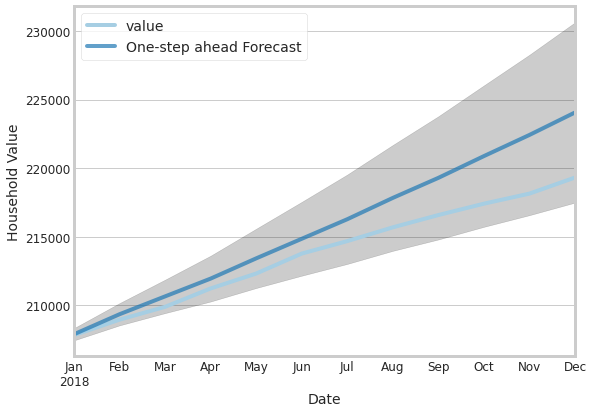

RMSE: 2429.884
R-squared: 0.55


In [281]:
col = 'zip_median'

## The 4 exogs below can be added to the model, but it was discovered that just the top one is significant
exogs = pd.DataFrame(data=empl.values, index=empl.index, columns=['Natl_Employment_#'])
#exogs['Natl_Unemployment_Rate'] = unempl.values
#exogs['Foreclosures'] = foreclosures.values
#exogs['30_Year_Mortgage'] = mtg.values

# train/test datasets
before2018 = pd.DataFrame(dfTS[col].loc['1997':'2017'], index=dfTS.loc['1997':'2017'].index)
exact2018 = pd.DataFrame(dfTS[col].loc['2018'], index=dfTS.loc['2018'].index)
train = before2018
train.columns = ['value']
test = exact2018
test.columns = ['value']

# find best arima/sarimax params, witg exog's, takes some time
df = pd.DataFrame(data=dfTS[col].values, index=dfTS.index, columns=['value'])
find_orders(df, exogs) # ((1, 1, 1), (1, 0, 0, 12))

# create model
model_output = fit_sarimax_model(train, exog=exogs.loc['1997':'2017'], order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), plot=False)  # AIC: 3452.996

# get predictions
get_predictions(test, exog=exogs.loc['2018'], model_output=model_output, plot=True, show=True)


In [0]:
# Run model on and export to csv
warnings.filterwarnings("ignore")

i=0
for col in dfTS.columns[0:100]:
    i = i+1
    if i % 300 == 0:
      print(str(i/300) + '%')
    
    df = pd.DataFrame(data=dfTS[col].values, index=dfTS.index, columns=['value'])
    model_output = fit_sarimax_model(df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), plot=False, summary=False)

    forecast = get_future(df, plot=False)

    roi_out = pd.DataFrame({'zip':col, 
                            'roi_2y':forecast['roi_2y'], 
                            'min_conf_2y':forecast['min_conf_2y'],
                            'max_conf_2y':forecast['max_conf_2y'],
                            'roi_5y':forecast['roi_5y'],
                            'min_conf_5y':forecast['min_conf_5y'],
                            'max_conf_5y':forecast['max_conf_5y']
                            })
roi_out.to_csv('/content/drive/My Drive/IST 718/zip_predictions_all.csv', mode='a', header=False)



In [0]:
# Run model on and export to csv
warnings.filterwarnings("ignore")

i=0
for col in dfTS.columns[5001:10000]:
    i = i+1
    if i % 300 == 0:
      print(str(i/300) + '%')
    
    df = pd.DataFrame(data=dfTS[col].values, index=dfTS.index, columns=['value'])
    model_output = fit_sarimax_model(df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), plot=False, summary=False)

    forecast = get_future(df, plot=False)

    roi_out = pd.DataFrame({'zip':col, 
                            'roi_2y':forecast['roi_2y'], 
                            'min_conf_2y':forecast['min_conf_2y'],
                            'max_conf_2y':forecast['max_conf_2y'],
                            'roi_5y':forecast['roi_5y'],
                            'min_conf_5y':forecast['min_conf_5y'],
                            'max_conf_5y':forecast['max_conf_5y']
                            })
roi_out.to_csv('/content/drive/My Drive/IST 718/zip_predictions_all2.csv', mode='a', header=False)

In [0]:
# Run model on and export to csv
warnings.filterwarnings("ignore")

i=0
for col in dfTS.columns[10001:13914]:
    i = i+1
    if i % 300 == 0:
      print(str(i/300) + '%')
    
    df = pd.DataFrame(data=dfTS[col].values, index=dfTS.index, columns=['value'])
    model_output = fit_sarimax_model(df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), plot=False, summary=False)

    forecast = get_future(df, plot=False)

    roi_out = pd.DataFrame({'zip':col, 
                            'roi_2y':forecast['roi_2y'], 
                            'min_conf_2y':forecast['min_conf_2y'],
                            'max_conf_2y':forecast['max_conf_2y'],
                            'roi_5y':forecast['roi_5y'],
                            'min_conf_5y':forecast['min_conf_5y'],
                            'max_conf_5y':forecast['max_conf_5y']
                            })
roi_out.to_csv('/content/drive/My Drive/IST 718/zip_predictions_all3.csv', mode='a', header=False)

#### **Data Modeling Questions**

***Provide an initial data analysis of the following Arkansas metro areas: Hot Springs, Little Rock, Fayetteville, Searcy?***

   Time series plot for the four regions was generated.  From this initial analysis, it appears that there has been fairly steady growth over the last two decades with declines aligning with the 2008 financial crisis. Of the 4 metro areas, Searcy seems to have been the least impacted by the crisis, however, homes in that area are at a much lower price-point than the others. Fayetteville seems to be the most promising from an investment standpoint as it has had consistent growth since 2012 at a higher rate than the other Arkansas metro areas, but the risk there is high. Probably a mixture of homes purchased in the Fayetteville and Little Rock metro areas would represent the safest investment strategy.   

***What technique/algorithm/decision process did you use to down sample?***

   Zip codes with missing data from 1997 to 2018 were removed. The remaining dataset had 13. 913 zip codes from 46 states.

***What three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)? Why?***


#### **Conclusion**

The United States housing bubble was a real estate bubble affecting over half of the U.S. states. Housing prices peaked in early 2006, started to decline in 2006 and 2007, and reached new lows in 2012. On December 30, 2008, the Case–Shiller home price index reported its largest price drop in its history. Since then the market has been recovering. Predicting real estate prices is not easy. The external factors like severe weather, earthquakes and viruses have to be considered too. 